# AI A4
Written by Babak Hosseini Mohtasham 810101408 in 1403\
Working with different vlassification and regression models to predict the house price of a dataset.

# Phase 1

### EDA

In [1853]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
import xgboost as xgb
from sklearn.svm import SVC
import scipy.stats.distributions
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_curve,auc
random_state=228

In [1854]:
original_df=pd.read_excel('DataSet.xlsx')
df=original_df.copy()

In [1855]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,NaN,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [1856]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,480.000000,506.000000,506.000000,506.000000,479.000000,506.000000,506.000000,506.000000,486.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.175000,1.101175,15.679800,58.744660,6.211663,78.063241,339.317787,42.614980,336.820947,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.380364,1.646991,27.220206,33.104049,6.527286,203.542157,180.670077,87.585243,121.174519,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.425900,4.000000,254.000000,17.000000,370.415000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.917500,5.000000,307.000000,18.900000,390.885000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.341400,24.000000,403.000000,20.200000,395.630000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


In [1857]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


number of na values in each coloumn:

In [1858]:
df.isna().sum()

CRIM        0
ZN          0
INDUS       0
CHAS       26
NOX         0
RM          0
AGE         0
DIS        27
RAD         0
TAX         0
PTRATIO     0
B          20
LSTAT       0
MEDV       54
dtype: int64

proportion of na values in each coloumn:

In [1859]:
df.isna().sum()/df.count()

CRIM       0.000000
ZN         0.000000
INDUS      0.000000
CHAS       0.054167
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS        0.056367
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.041152
LSTAT      0.000000
MEDV       0.119469
dtype: float64

We can see the CHAS column has just 2 unique values because it is a dummy variable. Other columns have more values so they have more unique values. The RAD column also has a low number of unique values which may be due to the way the index of accessibility to radial highways is calculated.

CRIM       452
ZN          27
INDUS       77
CHAS         2
NOX        132
RM         437
AGE        399
DIS        343
RAD         10
TAX         67
PTRATIO     85
B          357
LSTAT      445
MEDV       210
dtype: int64

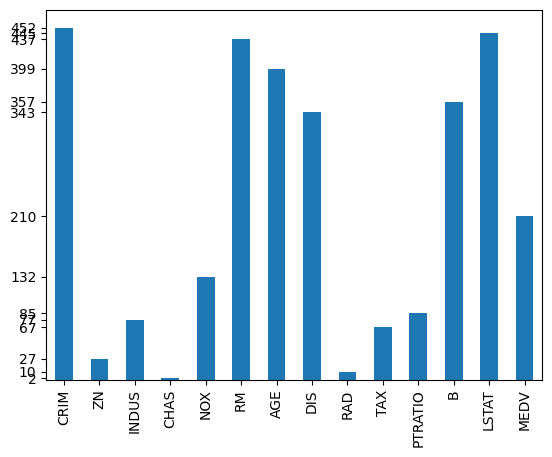

In [1860]:
df.nunique().plot(kind='bar',yticks=df.nunique())
df.nunique()

In a correlation matrix we can see the correlation of any pair of features. The darker each cell is the more the corresponding features are positively correlated and the negative values close to -1 indicate negative correlation while values near 0 indicate no correlation. In the correlation Matrix below we can see several positively correlated features:
* RM, RAD, DIS and NOX: it looks like that the houses with easier access to radial highways also have more rooms. Also these houses are farther from the five Boston employment centers and the nitric oxides concentration in their environment is greater. Furthermore, the pupil-teacher ratio in the townhood of these houses is greater.
* AGE, INDUS AND TAX: The houses with higher proportion of nonretail business acres per town seems to have greater proportion of owner-occupied units built prior to 1940 and also greater full-value property-tax rate per $10,000.
* CRIM and TAX: Interestingly the towns with full-value property-tax rate seems to have greater crime rate.
* MEDV, RM: The target feature(Median value of owner-occupied homes) seems to be positively correlated with the number of rooms a house has which sounds logical.\
And these are the observed negative correlations:
* B, NOX, RM, DIS and RAD: The four features which had positive correlation explained above are negatively correlated with B which is the proportion of blacks by town.

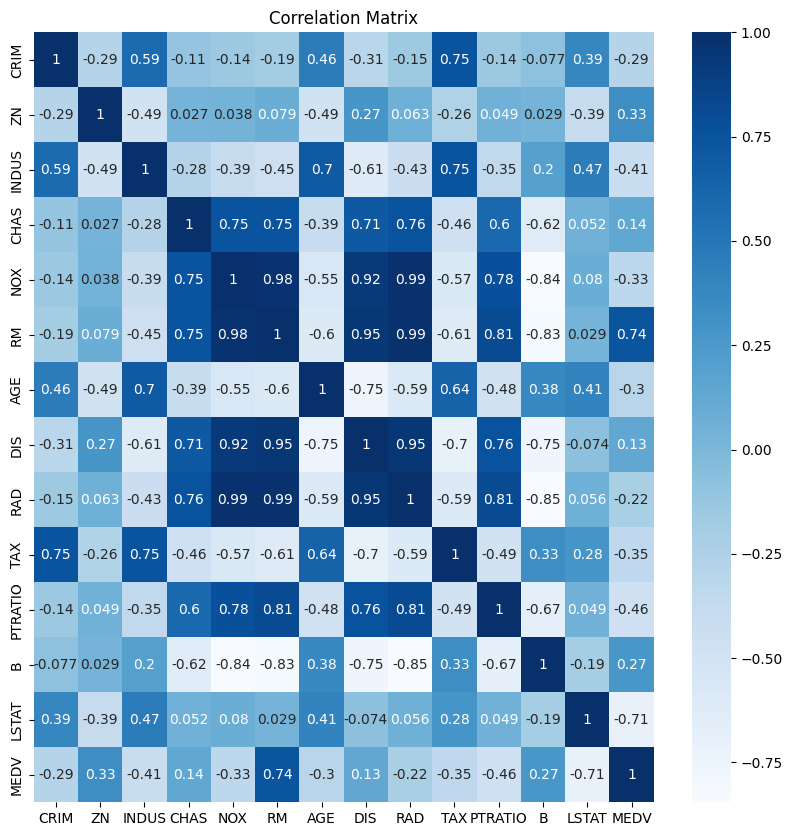

In [1861]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="Blues").set_title("Correlation Matrix")
plt.show()

Both scatterplot and do kinda the same thing and that is showing the values of two features for each data point. Though unlike a traditional scatter plot, where each data point is represented as a single dot, a hexbin plot aggregates the data points into a set of hexagonal bins. Each hexagonal bin is color-coded to represent the density of data points within that bin. The color scale is usually represented by a color map that ranges from light to dark, where lighter colors indicate lower densities and darker colors indicate higher densities.\
In addition to showing the relationship between two variables, hexbin plots can also be used to visualize the distribution of the data, identify outliers, and detect regions of high and low density. These plots are also useful for exploring the relationship between two variables in a non-parametric way, as they do not make assumptions about the underlying distribution of the data.

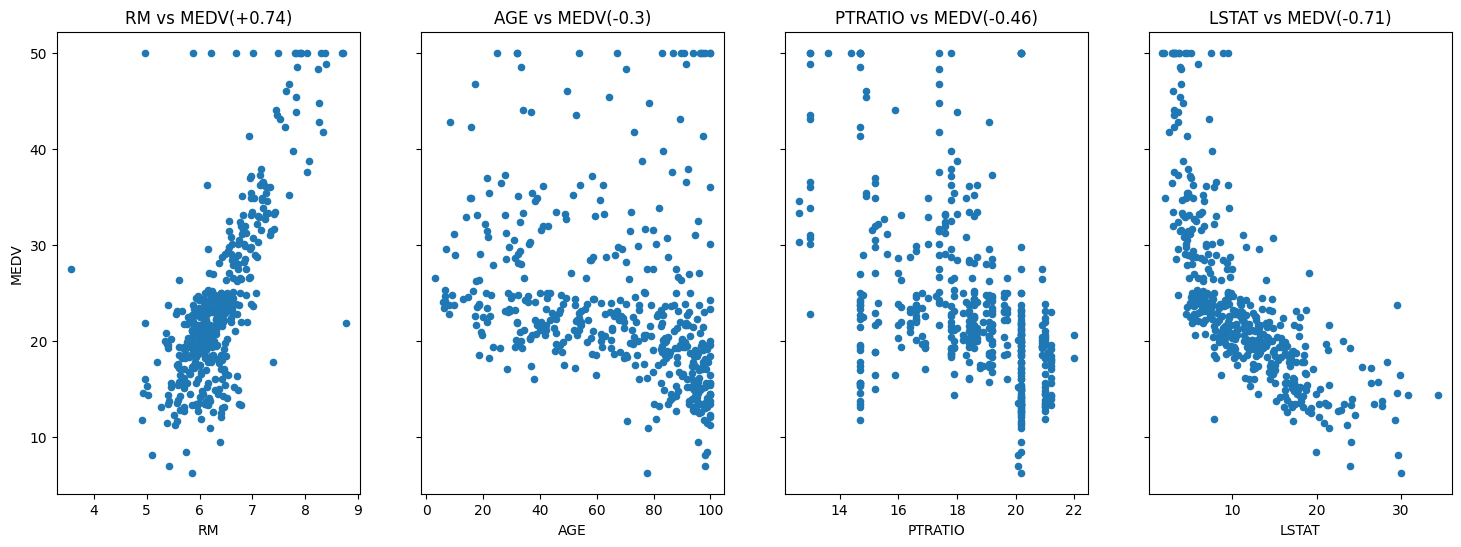

In [1862]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=True)
axes[0].set_title('RM vs MEDV(+0.74)')
df.plot.scatter(x='RM', y='MEDV', ax=axes[0])
axes[1].set_title('AGE vs MEDV(-0.3)')
df.plot.scatter(x='AGE', y='MEDV', ax=axes[1])
axes[2].set_title('PTRATIO vs MEDV(-0.46)')
df.plot.scatter(x='PTRATIO', y='MEDV', ax=axes[2])
axes[3].set_title('LSTAT vs MEDV(-0.71)')
df.plot.scatter(x='LSTAT', y='MEDV', ax=axes[3])
plt.show()

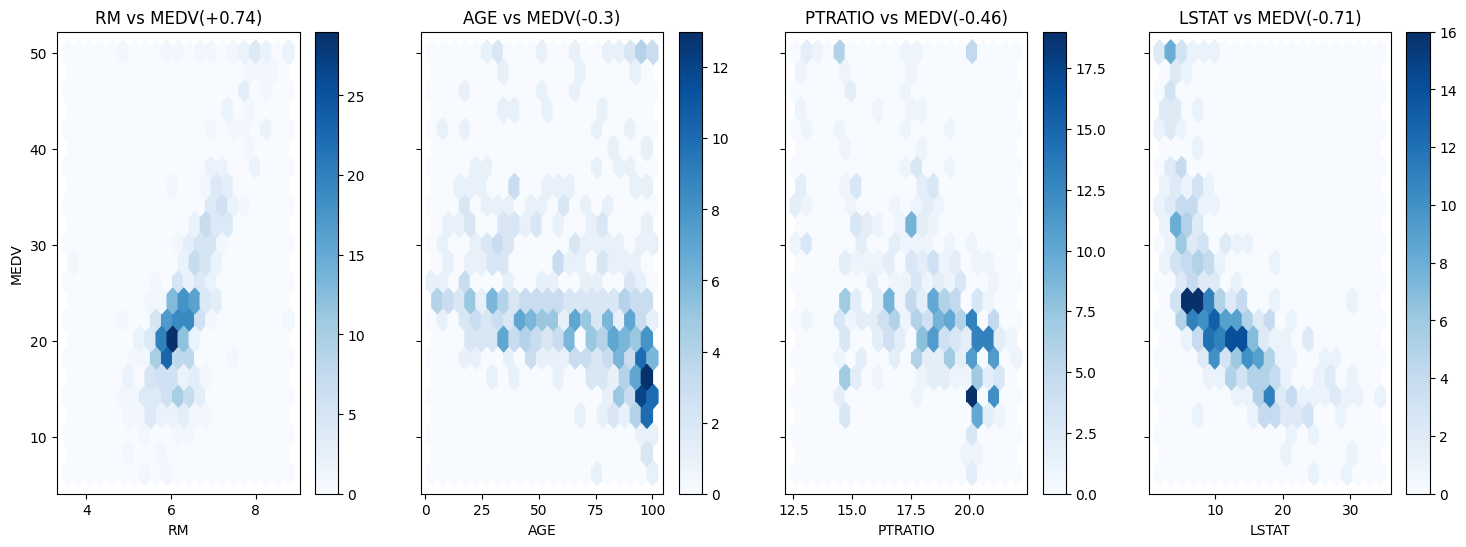

In [1863]:
gridsize=20
fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=True)
axes[0].set_title('RM vs MEDV(+0.74)')
df.plot.hexbin(x='RM', y='MEDV', gridsize=gridsize, ax=axes[0], cmap="Blues")
axes[1].set_title('AGE vs MEDV(-0.3)')
df.plot.hexbin(x='AGE', y='MEDV', gridsize=gridsize, ax=axes[1], cmap="Blues")
axes[2].set_title('PTRATIO vs MEDV(-0.46)')
df.plot.hexbin(x='PTRATIO', y='MEDV', gridsize=gridsize, ax=axes[2], cmap="Blues")
axes[3].set_title('LSTAT vs MEDV(-0.71)')
df.plot.hexbin(x='LSTAT', y='MEDV', gridsize=gridsize, ax=axes[3], cmap="Blues")
plt.show()

We can see the price of houses is kinda normal though it is right skewed. We can see a pike for prices around 50,000$ the reason may be that the prices tend to be multiples of ten and five and expensive houses less than or greater than 50,000$ will tend towards 50,000$ to have a round price. I think the graph is right skewed because there are less expensive houses than there are medium and low prices houses.

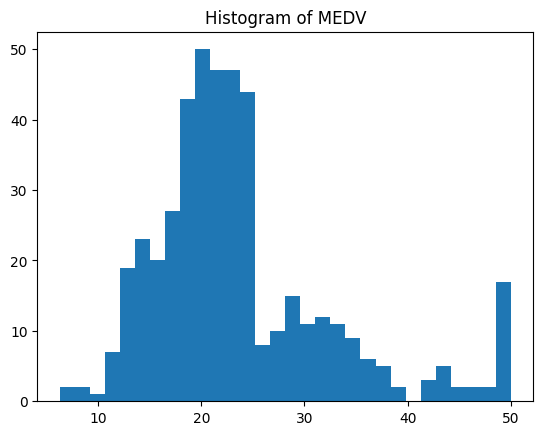

In [1864]:
plt.hist(df['MEDV'].dropna(),bins=30)
plt.title('Histogram of MEDV')
plt.show()

Not surprisingly most houses has low number of rooms while there are few houses with much more rooms.

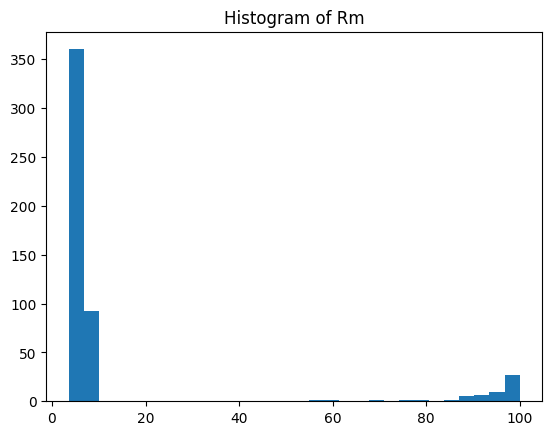

In [1865]:
plt.hist(df['RM'].dropna(), bins=30)
plt.title("Histogram of Rm")
plt.show()

## Preprocessing

7. There are many ways to deal with missing values and here a few:
* **Deletion**: You can simply delete rows or columns with missing values. This is the easiest approach, but it can lead to loss of valuable data, especially if the missing values are not randomly distributed. I've used this technique for the target feautre(MEDV) that's because we are trying to train a model based on the target variable so if it has any missing data I think the best solution is to remove them because our model is a supervised learning model.
* **Domain Knowledge**: Sometimes, domain knowledge can help you fill in missing values. For example, if you're dealing with time-series data, you might know that certain values tend to follow a seasonal pattern, which can inform your imputation strategy.
* **Mean/Median/Mode Imputation**: Replace missing values with the mean, median, or mode of the respective column. Here I've used the tried to used the data from similar rows to fill the missing values. I've chosen the feature to measure the similarity to be the feature with most or least correlation with the missing feature. I've used mean for B and mode for CHAS.
* **Forward Fill/Backward Fill**: Propagate the last known value forward or backward in the time series.
* **Linear Regression Imputation**: Predict missing values using a regression model trained on non-missing values.
* **K-Nearest Neighbors (KNN) Imputation**: Replace missing values with the average of the K nearest neighbors' values. I've used this technique to fill missing values of the DIS feature.
* **Multiple Imputation**: Generate multiple imputed datasets and analyze each one separately, then pool the results.

In [1866]:
df.isna().sum()

CRIM        0
ZN          0
INDUS       0
CHAS       26
NOX         0
RM          0
AGE         0
DIS        27
RAD         0
TAX         0
PTRATIO     0
B          20
LSTAT       0
MEDV       54
dtype: int64

In [1867]:
df.dropna(thresh=len(df.columns)-2,inplace=True)
df.isna().sum()

CRIM        0
ZN          0
INDUS       0
CHAS       26
NOX         0
RM          0
AGE         0
DIS        27
RAD         0
TAX         0
PTRATIO     0
B          20
LSTAT       0
MEDV       54
dtype: int64

In [1868]:
imputer=KNNImputer()
df['DIS']=imputer.fit_transform(df[['DIS']])
df['DIS'].isna().sum()

0

In [1869]:
ref = df.groupby('RAD')['B'].mean()
df['B'] = df['B'].fillna(df['RAD'].map(ref))
df['B'].isna().sum()

0

In [1870]:
df['CHAS'].fillna(value=df['CHAS'].mode()[0], inplace=True)
df['CHAS'].isna().sum()

0

In [1871]:
df.dropna(subset=['MEDV'], inplace=True)
df['MEDV'].isna().sum()

0

We can see correlation of CRIM and RAD is 0.9 so we can remove one. Because RAD is also highly correlated with TAX and CRIM is more negatively correlated with MEDV so I think its better to remove RAD.

Text(0.5, 1.0, 'Correlation Matrix before removal of RAD')

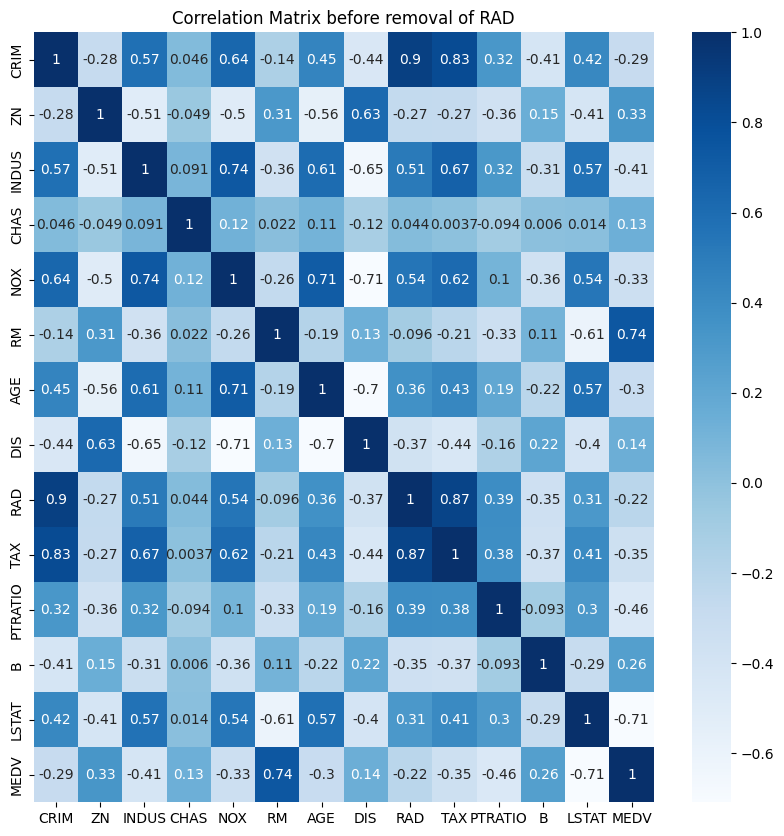

In [1872]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="Blues").set_title(
    "Correlation Matrix before removal of RAD")

In [1873]:
df=df[[col for col in df.columns.to_list() if col not in ['RAD']]]

In [1874]:
df.drop_duplicates(inplace=True)
df.count()

/tmp/ipykernel_3446/3728969735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


CRIM       452
ZN         452
INDUS      452
CHAS       452
NOX        452
RM         452
AGE        452
DIS        452
TAX        452
PTRATIO    452
B          452
LSTAT      452
MEDV       452
dtype: int64

Text(0.5, 1.0, 'Correlation Matrix after removal of RAD')

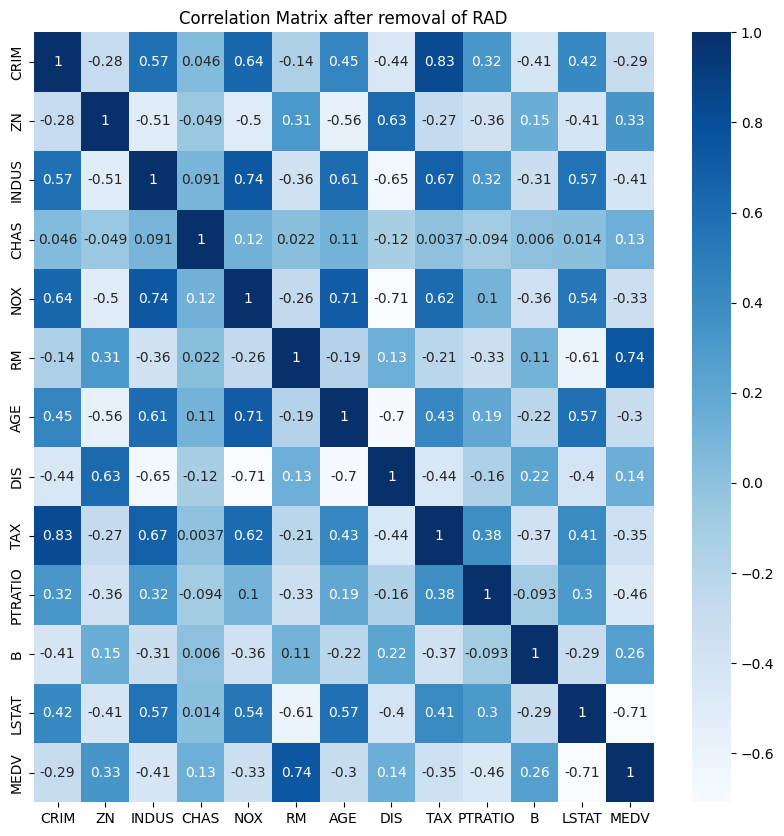

In [1875]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="Blues").set_title(
    "Correlation Matrix after removal of RAD")

**Numerical Features**: Numerical features are variables that represent measurable quantities and are typically expressed as numbers. These can be further categorized into two types:
* **Continuous Variables**: Continuous variables can take any numeric value within a certain range. Examples include age, height, weight, temperature, and income. These variables can be measured with precision and can theoretically have an infinite number of values within a given range.
* **Discrete Variables**: Discrete variables can only take on specific, distinct values and often represent counts or whole numbers. Examples include the number of children in a family, the number of cars owned by a person, or the number of items sold. Discrete variables can be thought of as "countable" variables.

**Categorical Features**: Categorical features are variables that represent categories or labels and typically have a fixed number of unique values. These values do not have inherent numerical meaning, and they represent qualitative characteristics. Categorical features can be further divided into two types:
* **Nominal Variables**: Nominal variables represent categories with no inherent order or ranking. Examples include gender, race, marital status, and type of car. Nominal variables are purely descriptive and do not imply any sort of hierarchy among the categories.
* **Ordinal Variables**: Ordinal variables represent categories with a clear order or ranking. While the categories themselves are distinct, there is a meaningful relationship between them in terms of their relative position. Examples include educational level (e.g., high school, college, graduate school), income level (e.g., low, medium, high), or satisfaction level (e.g., poor, fair, good, excellent). Unlike nominal variables, ordinal variables have a natural ordering or hierarchy.

In the given data set all features are numerical though the CHAS feature can be though as a nominal categorical feature because it's a dummy variable. Also all features are continuous else RAD.

Feature Scaling is an important step to take prior to training of machine learning models to ensure that features are within the same scale.\
`Min Max Normalization` maps the data in the range 0 to 1.
$$MinMaxNormalization: X' = \frac{(X - X_{min})}{(X_{max} - X_{min})}$$
`Standardization` maps the data to have a mean of 0 and a standard deviation of 1.
$$Standardization: X' = \frac{(X - \mu)}{\sigma}$$
Standardization is preferred for algorithms that are sensitive to feature scale or assume normality, such as Logistic Regression and Support Vector Machines, while normalization is better suited for distance-based algorithms like k-nearest neighbours(KNN). So I'll use standardization for this project.

In [1876]:
X, y = df[df.columns.difference(['MEDV'])], df['MEDV']

In [1877]:
def train_validation_test_split(scaler,X,y,test_size,validation_size,random_state):
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
    X_train_validation, X_test, y_train_validation, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)
    X_train, X_validation, y_train, y_validation = train_test_split(
        X_train_validation, y_train_validation, test_size=validation_size/0.9, random_state=random_state)
    return X_train_validation, X_test, y_train_validation, y_test, X_train, X_validation, y_train, y_validation 

Based on the feature and its time we can perform different preprocessings.
* We can turn the categorical features to numerical features by giving them number labels though this makes the order of the nubers important and that is usyually not good for nominal features.
* We can use the one-hot method and turn each categorical feature into a list of dummy variables that rows are 0 in all these features except for the column that represent their original value.
* We can do several diferrent natural language preprocessings if the data is natural language text. These techniques include removing punctuation, stopwords, stemming, lemmatization, etc.

If we the model we use has different hyperparameters like the linear regression models we are going to use in this project we usually split data to three different parts.
1. First is the train data which is the data used to train the model and find different hidden patterns in data which can be used for predicting a specific feature.
2. After training our model with train data we usually evaluate the model on the next type of data called validation. Then by changing hthe hyperparameters and reevaluating the model we can get the desired accuracy. Furthermore, by observing the changes in our evaluation data for different number of samples we can understand when the model is overfitting sand stop it. By iteratively spliting data to train and validation and evaluating our model we can reach a good result.
3. Finally after finding the best hyperparameters we predict the never before used data called test data to evaluate our model to get an overall score that we'd expect to get when facing real life data.

Some other common steps in data preprocessing include:

* **Data Transformation**: This involves converting the data into a suitable format for analysis. Common techniques used in data transformation include normalization, standardization, and discretization. Normalization is used to scale the data to a common range, while standardization is used to transform the data to have zero mean and unit variance. Discretization is used to convert continuous data into discrete categories.

* **Data Reduction**: This involves reducing the size of the dataset while preserving the important information. Data reduction can be achieved through techniques such as feature selection and feature extraction. Feature selection involves selecting a subset of relevant features from the dataset, while feature extraction involves transforming the data into a lower-dimensional space while preserving the important information.

* **Data Discretization**: This involves dividing continuous data into discrete categories or intervals. Discretization is often used in data mining and machine learning algorithms that require categorical data. Discretization can be achieved through techniques such as equal width binning, equal frequency binning, and clustering.

* **Feature Selection**: This involves selecting a subset of relevant features from the dataset. Feature selection is often performed to remove irrelevant or redundant features from the dataset. It can be done using various techniques such as correlation analysis, mutual information, and principal component analysis (PCA).

* **Feature Extraction**: This involves transforming the data into a lower-dimensional space while preserving the important information. Feature extraction is often used when the original features are high-dimensional and complex. It can be done using techniques such as PCA, linear discriminant analysis (LDA), and non-negative matrix factorization (NMF).

* **Sampling**: This involves selecting a subset of data points from the dataset. Sampling is often used to reduce the size of the dataset while preserving the important information. It can be done using techniques such as random sampling, stratified sampling, and systematic sampling.

* **Clustering**: This involves grouping similar data points together into clusters. Clustering is often used to reduce the size of the dataset by replacing similar data points with a representative centroid. It can be done using techniques such as k-means, hierarchical clustering, and density-based clustering.

* **Compression**: This involves compressing the dataset while preserving the important information. Compression is often used to reduce the size of the dataset for storage and transmission purposes. It can be done using techniques such as wavelet compression, JPEG compression, and gzip compression.

From the clustering project we know too many features can cause problems also known as curse of dimensionality. So it may be a good idea to use the PCA algorithm to reduce the number of features used for predicting. This can also make visualizing data easier.

In [1878]:
X_train_validation, X_test, y_train_validation, y_test, X_train, X_validation, y_train, y_validation = \
train_validation_test_split(StandardScaler(),X,y,0.1,0.1,random_state)

In [1879]:
transformer = PCA(n_components=1)
PCA_X_train = transformer.fit_transform(X_train).flatten()
PCA_X_validation = transformer.fit_transform(X_validation).flatten()

# Phase 1

In [1880]:
class MyModel:
    def fit(self,X,y):
        pass

    def predict(self,X):
        pass

## Linear Regression

* **Supervised Learning**: In supervised learning, the algorithm learns from labeled data, where each input is associated with a corresponding target output.\
The goal is to learn a mapping function from input variables to output variables, such as classification (predicting a categorical label) or regression (predicting a continuous value).\
The algorithm is trained on a dataset with known input-output pairs, and it adjusts its parameters to minimize the difference between predicted and actual outputs.\
Examples include linear regression, logistic regression, decision trees, support vector machines (SVM), and neural networks.

* **Unsupervised Learning**: In unsupervised learning, the algorithm learns patterns and relationships from unlabeled data without explicit supervision.\
The goal is to explore the structure of the data, discover hidden patterns, and extract useful insights.\
Common tasks include clustering (grouping similar data points together), dimensionality reduction (reducing the number of features while preserving important information), and anomaly detection (identifying unusual or suspicious data points).\
Examples include k-means clustering, hierarchical clustering, principal component analysis (PCA), and autoencoders.

* **Semi-Supervised Learning**: Semi-supervised learning lies between supervised and unsupervised learning and combines elements of both.
It leverages a small amount of labeled data along with a larger amount of unlabeled data to improve model performance.\
The algorithm learns from both the labeled and unlabeled data to generalize better and make more accurate predictions.\
Semi-supervised learning is useful when labeled data is scarce or expensive to obtain, but unlabeled data is abundant.\
Techniques include self-training, co-training, and using generative models to label unlabeled data.

* **Reinforcement Learning:** In reinforcement learning, an agent learns to interact with an environment to achieve a goal through trial and error.\
The agent takes actions in the environment, receives feedback in the form of rewards or penalties, and learns to optimize its actions to maximize cumulative rewards over time.\
Reinforcement learning is suitable for sequential decision-making problems with delayed feedback, such as game playing, robotics, and autonomous driving.\
Key components include the agent (learner), environment, actions, rewards, and policy (strategy for selecting actions).
Algorithms include Q-learning, deep Q-networks (DQN), policy gradients, and actor-critic methods.\

In summary, supervised learning deals with labeled data and aims to learn a mapping between inputs and outputs, unsupervised learning deals with unlabeled data and aims to discover patterns and relationships, semi-supervised learning utilizes both labeled and unlabeled data, and reinforcement learning focuses on learning optimal decision-making strategies through interaction with an environment. Each approach has its own set of algorithms, techniques, and applications.

Supervised learning is divided into two categories:
* **Regression**: The output values are real numbers. It solves problems like trying to predict prices or number of products a factory should produce given a number of features. Linear regression is a type of a regression model.
* **Classification**: The output values are classes or categories. It solves problems like trying to predict what is in a given image or email spam detection. Logistic regression is a type of a classification model.

In the formulae below f(x) is the value of target feature for each sample. alpha and beta are constants we are trying to find and x is the input features. In linear regression we are trying to minimize a loss function which in here is RSS. Rss is sums the squares of difference of predicted and true target values of all samples. By computing the derivative we can understand for what values of alpha and beta can we predict the target values such that the loss function would become minimum. Finally we've found the best alpha and beta for the given RSS loss function and we can implement them in our code.  

I think the best feature to use as input for our model is RM because it had the highest correlation with our target variable in the correlation matrix. Furthermore, using pca to reduce the number of features to 1 and use that as input may also be a good idea so let's try both.

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

```python

def linear_regression(input, output):
    slope = ((input-input.mean())*(output-output.mean())).sum() / \
        ((input-input.mean())**2).sum()
    intercept=output.mean()-slope*input.mean()
    return slope, intercept

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

```python

def get_regression_predictions(input, intercept, slope):
    return slope*input+intercept

* **Residual Sum of Squares (RSS)**:\
RSS measures the total squared difference between the predicted values and the actual values in the training dataset.\
Mathematically, RSS is calculated as the sum of the squared residuals (the differences between predicted and actual values).\
RSS is given by the formula:
$$RSS = \sum_{i=1}^{n}(y_{i}-\hat{y})^{2}$$
$\quad \quad$ where $y_{i}$ is the actual value, $\hat{y}$ is the predicted value and n is the number of observations.

* **Mean Squared Error (MSE)**:\
MSE is the average of the squared differences between predicted and actual values.\
It is obtained by dividing the RSS by the number of observations.\
MSE is given by the formula:
$$MSE  = \frac{1}{n} \times RSS = \frac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{y})^{2}$$

* **Root Mean Squared Error (RMSE)**:\
RMSE is the square root of the MSE and provides a measure of the average magnitude of the errors in the predictions.\
It is in the same units as the target variable, making it easier to interpret.\
RMSE is given by the formula:
$$RMSE= \sqrt{MSE} = \sqrt{\frac{1}{n} \times RSS} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{y})^{2}}$$

* **Total Sum of Squares (TSS)**:
TSS measures the total squared difference between the actual values and the actual values and the mean of the target variable.\
TSS is given by the formula:
$$TSS = \sum_{i=1}^{n}(y_{i}-\bar{y})^{2}$$
$\quad \quad$ where $\bar{y}$ is the mean of the actual values.

* **R-squared (R2) Score**:\
R2 score measures the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in the model.\
It is a relative measure of model fit and ranges from 0 to 1, with higher values indicating better fit.\
R2 score of 1 indicates that the model perfectly predicts the target variable, while a score of 0 indicates that the model does not explain any of the variance in the target variable better than a horizontal line.\
R2 score is given by the formula:
$$R^{2} Score=1-\frac{RSS}{TSS}=1-\frac{\sum_{i=1}^{n}(y_{i}-\hat{y})^{2}}{\sum_{i=1}^{n}(y_{i}-\bar{y})^{2}}$$

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

```python
def get_root_mean_square_error(predicted_values, actual_values):
    return (np.sqrt((predicted_values-actual_values)**2).mean())

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \hat{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

```python

def get_r2_score(predicted_values, actual_values):
    return 1-((predicted_values-actual_values)**2).sum()/((actual_values-actual_values.mean())**2).sum()

In [1881]:
class MyRegressor(MyModel):
    def get_root_mean_square_error(self,predicted_values, actual_values):
        return (np.sqrt((predicted_values-actual_values)**2).mean())
    
    def get_r2_score(self,predicted_values, actual_values):
        return 1-((predicted_values-actual_values)**2).sum()/((actual_values-actual_values.mean())**2).sum()
    
    def plot_line(self,predicted_values, actual_values):
        pass

In [1882]:
class MyLinearRegressor(MyRegressor):
    def fit(self,X, y):
        self.slope = ((X-X.mean())*(y-y.mean())).sum() / \
            ((X-X.mean())**2).sum()
        self.intercept=y.mean()-self.slope*X.mean()
        
    def predict(self,X):
        return self.slope*X+self.intercept

    def plot_line(self,predicted_values, actual_values):
        plt.scatter(actual_values, predicted_values, color='blue')
        plt.plot(np.arange(50), np.arange(50), color='red')
        plt.show()

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

In [1883]:
designated_feature_list = ['CHAS', 'PTRATIO', 'LSTAT','RM']

linear_regression_model = MyLinearRegressor()

for feature in designated_feature_list:
  linear_regression_model.fit(X_train[feature].values, y_train.values)
  predictions = linear_regression_model.predict(X_validation[feature].values)
  print(f"Feature: {feature} RMSE: {round(linear_regression_model.get_root_mean_square_error(predictions,y_validation.values),3)} " +
        f"R2 score: {round(linear_regression_model.get_r2_score(predictions,y_validation.values),3)}")

Feature: CHAS RMSE: 5.954 R2 score: 0.033
Feature: PTRATIO RMSE: 5.652 R2 score: 0.106
Feature: LSTAT RMSE: 4.948 R2 score: 0.364
Feature: RM RMSE: 3.867 R2 score: 0.536


Looks like using PCA works poorly here. As expected using the features with correlation close to 1 or -1 gives better results than using features with correlation close to 0.

In [1884]:
PCA_model = MyLinearRegressor()
PCA_model.fit(
    PCA_X_train, y_train)
predictions = PCA_model.predict(
    PCA_X_validation)
print(f"Feature: PCA of features RMSE: {round(PCA_model.get_root_mean_square_error(predictions,y_validation),3)} " +
      f"R2 score: {round(PCA_model.get_r2_score(predictions,y_validation),3)}")

Feature: PCA of features RMSE: 8.507 R2 score: -0.732


Feature: RM RMSE: 2.625 R2 score: 0.841


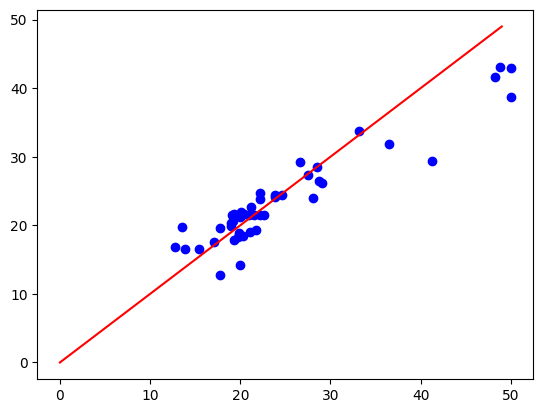

In [1885]:
linear_regression_model.fit(X_train_validation['RM'], y_train_validation)
predictions=linear_regression_model.predict(X_test['RM'])
print(f"Feature: {feature} RMSE: {round(linear_regression_model.get_root_mean_square_error(predictions,y_test),3)} "+\
      f"R2 score: {round(linear_regression_model.get_r2_score(predictions,y_test),3)}")
linear_regression_model.plot_line(predictions, y_test)

# Ploynomial Regression

To extend the simple linear regression to polynomial regression, we can model the relationship between the independent variable $x$ and the dependent variable $y$ as a polynomial function of degree $n$:

$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

The steps to find the parameters $\beta_i$ are similar to those in simple linear regression. We again minimize the RSS function by taking the derivatives with respect to each parameter and setting them to 0.

- Step 1: Compute the RSS function for polynomial regression:

$$ RSS = \Sigma (y_i - (\hat{\beta_0} + \hat{\beta_1}x_i + \hat{\beta_2}x_i^2 + \ldots + \hat{\beta_n}x_i^n))^2 $$

- Step 2: Compute the derivatives of the RSS function with respect to each parameter $\beta_i$ and set them to 0 to find the desired parameters.

$$ \frac{\partial RSS}{\partial \beta_i} = 0, \text{ for } i = 0, 1, 2, \ldots, n$$

Solving these equations will give us the optimal values of $\beta_i$ for the polynomial regression model. The specific form of the equations will depend on the degree of the polynomial and the number of parameters.

The general form for finding the coefficients for polynomial regression can be represented as:

$$ \beta = (X^T X)^{-1} X^T y $$

where:
- $X$ is the design matrix with columns $x^0, x^1, x^2, ..., x^n$
- $x^i$ represents the feature vector of $x$ raised to the power of $i$
- $y$ is the target variable vector
- $\beta$ is the coefficient vector for the polynomial regression

By solving for $\beta$ using the above formula, we can obtain the coefficients for the polynomial regression model.

```python

def poly_features(X, degree):
  X=X.reshape(-1,1)
  X_poly=np.ones((len(X),1))
  for i in range(1, degree+1):
    X_poly=np.hstack((X_poly,X**i))
  return X_poly

```python
def polynomial_regression(X, y, degree):
  X = poly_features(X.to_numpy(),degree)
  return np.linalg.inv(X.T@X)@X.T@y

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


```python

def feature_derivative(errors, feature):
  return 2*np.dot(errors,feature)

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

```python

def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame.loc[:,feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame

def predict_output(feature_matrix, weights):
    #TO DO FOR POLYNOMIAL REGRESSION PREDICTION
    return np.dot(feature_matrix,weights)

## Polynomial Regression Using Gradient Descent

Polynomial regression using gradient descent involves finding the optimal parameters for a polynomial model by iteratively updating them based on the gradient of a loss function, typically the Mean Squared Error (MSE). The steps involved are as follows:

- **Step 1: Define the polynomial model**
The polynomial model has the form:
$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

- **Step 2: Define the loss function**
The loss function, such as Mean Squared Error (MSE), measures the error between the actual target values and the predicted values by the model.

- **Step 3: Initialize the coefficients**
Start with initial guesses for the coefficients $\beta_0, \beta_1, \ldots, \beta_n$

- **Step 4: Update the coefficients using Gradient Descent**
Iteratively update the coefficients to minimize the loss function. This is done by computing the gradient of the loss function with respect to each coefficient and making small adjustments in the opposite direction of the gradient.

- **Step 5: Repeat until convergence**
Continue updating the coefficients iteratively until the algorithm converges to the optimal values.

- **Step 6: Use the learned coefficients for prediction**
Once the coefficients converge, they can be used in the polynomial function to make predictions on new data points.

Overall, polynomial regression using gradient descent is an iterative optimization process that aims to find the best-fitting polynomial curve to the data points by minimizing the prediction errors. The learning rate and the number of iterations are key hyperparameters to tune for efficient convergence and accurate modeling.



```python

def polynomial_regression_gradient_descent(feature_matrix, outputs, initial_weights, step_size, tolerance):
    weights = np.array(initial_weights)
    while True:
        # Compute predictions using polynomial function and errors
        predictions=predict_output(feature_matrix, weights)
        errors = outputs-predictions

        # Compute derivatives for all weights
        gradient = feature_derivative(errors, feature_matrix)

        # Update weights and bias
        weights += 2*gradient*step_size

        # Check convergence
        if np.linalg.norm(gradient) < tolerance:
            break

    return weights

```python
def run_polynomial_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    weights = np.array(initial_weights)
    weights = polynomial_regression_gradient_descent(chosen_feature_matrix, target_matrix, weights, step_size, tolerance)

    return weights


def get_weights_and_bias(chosen_features,degree, X_train, y_train):

    keywords = {
        'initial_weights': np.array([.5]*(degree+1)),
        'step_size': 1.e-7,
        'tolerance': 9.e-8,
    }
    chosen_feature_dataframe = X_train[chosen_features]
    chosen_feature_matrix = normalize_features(chosen_features, chosen_feature_dataframe).to_numpy()
    chosen_feature_matrix=poly_features(chosen_feature_matrix,degree)
    weights = run_polynomial_regression(
        chosen_feature_matrix, y_train.to_numpy(), keywords)
    return chosen_feature_matrix, weights

In [1944]:
class MyPolynomialRegressor(MyRegressor):
    def __init__(self):
        self.keywords = {
            'initial_weights': np.array([.5]),
            'step_size': 1.e-7,
            'tolerance': 1.e-4,
        }

    def set_keywords(self,initial_weights=None,step_size=None,tolerance=None):
        self.keywords['initial_weights'] = initial_weights or self.keywords['initial_weights']
        self.keywords['step_size'] = step_size or self.keywords['step_size']
        self.keywords['tolerance'] = tolerance or self.keywords['tolerance']

    def _poly_features(self,X):
        X = np.array(X).reshape(-1, 1)
        X_poly = np.ones((len(X), 1))
        for i in range(1, self.degree+1):
            X_poly=np.hstack((X_poly,X**i))
        return X_poly
    
    def _normal_fit(self,X, y):
        X = self._poly_features(X)
        return np.linalg.inv(X.T@X)@X.T@y
    
    def _feature_derivative(self, errors, X):
        poly_X=self._poly_features(X)
        return 2*np.dot(errors,poly_X)

    def _find_weights_using_gradient(self,X, y):
        self.B = np.array(self.keywords["initial_weights"])
        gradient=np.inf
        while np.linalg.norm(gradient) > self.keywords["tolerance"]:
            # Compute predictions using polynomial function and errors
            predictions = self.predict(X)
            errors = y-predictions

            # Compute derivatives for all weights
            gradient = self._feature_derivative(errors, X)

            # Update weights and bias
            self.B += 2*gradient*self.keywords["step_size"]
             
        return self.B

    def _gradient_fit(self,X, y):
        self.keywords["initial_weights"] = np.array([.5]*(self.degree+1))
        return self._find_weights_using_gradient(X, y)

    def fit(self, method, degree,X, y):
        self.degree=degree
        if method=="Normal":
            self.B = self._normal_fit(X, np.array(y))
        elif method=="Gradient":
            self.B = self._gradient_fit(X, np.array(y))

    def predict(self,X):
        poly_X = self._poly_features(X)
        return np.dot(poly_X, self.B)
    
    def plot_line(self,X, y):
        predicted_values = self.predict(X)
        fig,axes=plt.subplots(1,2)
        axes[0].scatter(y, predicted_values, color='blue')
        axes[0].plot(np.arange(y.min(), y.max()+1),
                     np.arange(y.min(), y.max()+1), color='red')
        X=np.array(X).reshape(-1,1)
        t=np.linspace(X.min(),X.max(),100)
        axes[1].scatter(X, y, color='blue')
        predicted_values = self.predict(t)
        axes[1].plot(t, predicted_values, color='red')
        fig.suptitle(f"Polynomial Regression with degree = {self.degree}")
        plt.show()

Feature: RM RMSE: 2.625 R2 score: 0.841


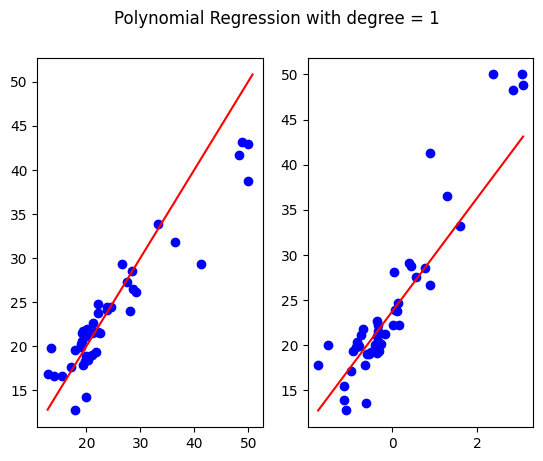

Feature: RM RMSE: 2.132 R2 score: 0.887


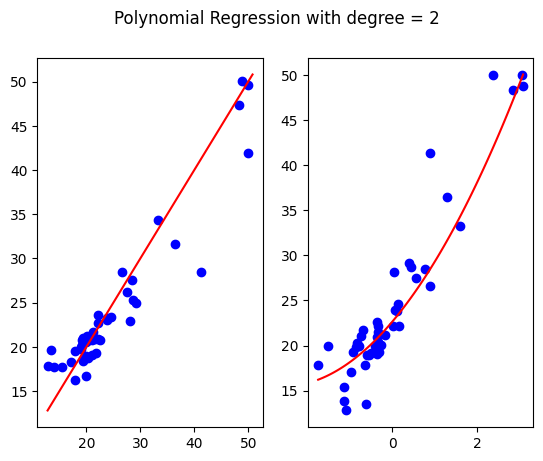

Feature: RM RMSE: 2.17 R2 score: 0.893


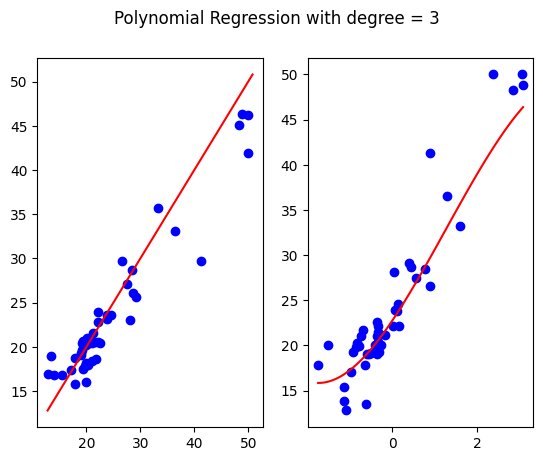

Feature: RM RMSE: 2.22 R2 score: 0.894


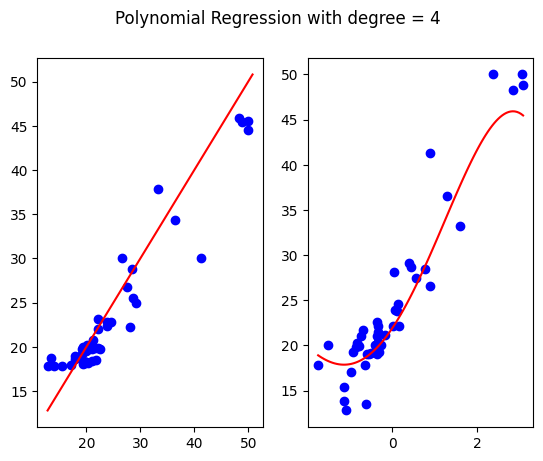

Feature: RM RMSE: 2.106 R2 score: 0.898


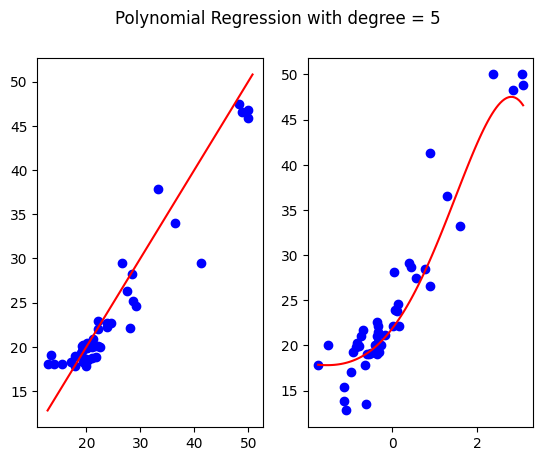

In [1914]:
for degree in range(1,6):
      polynomial_regression_model = MyPolynomialRegressor()
      polynomial_regression_model.fit(
      "Normal", degree, X_train_validation["RM"], y_train_validation)
      predictions=polynomial_regression_model.predict(X_test["RM"])
      print(f"Feature: RM RMSE: {round(polynomial_regression_model.get_root_mean_square_error(predictions,y_test),3)} " +
            f"R2 score: {round(polynomial_regression_model.get_r2_score(predictions,y_test),3)}")
      polynomial_regression_model.plot_line(X_test["RM"], y_test)

Feature: RM RMSE: 2.659 R2 score: 0.833


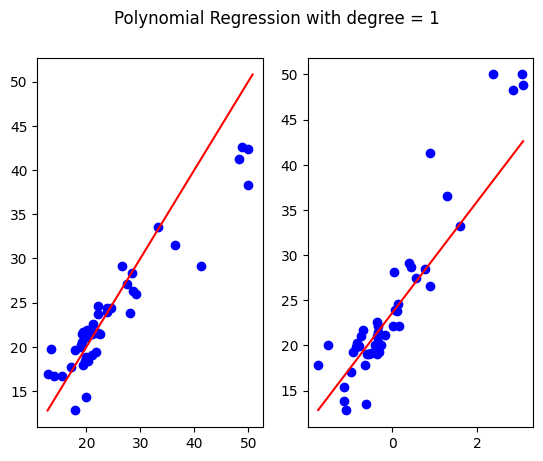

Feature: RM RMSE: 2.165 R2 score: 0.883


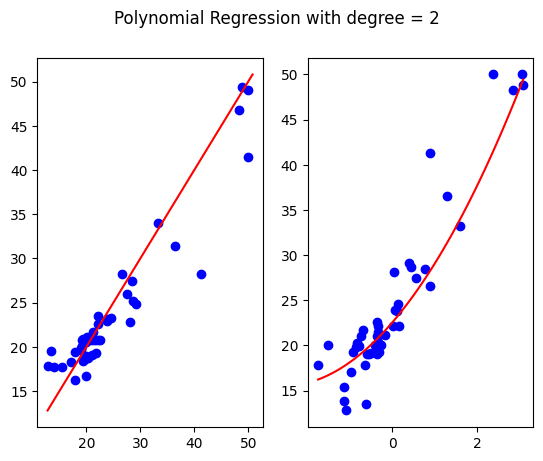

Feature: RM RMSE: 2.213 R2 score: 0.887


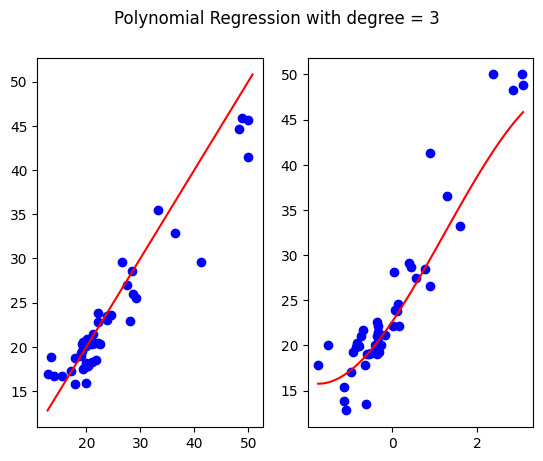

Feature: RM RMSE: 2.291 R2 score: 0.89


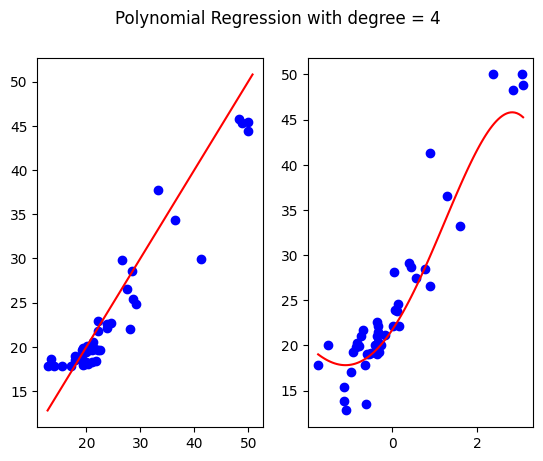

Feature: RM RMSE: 2.171 R2 score: 0.895


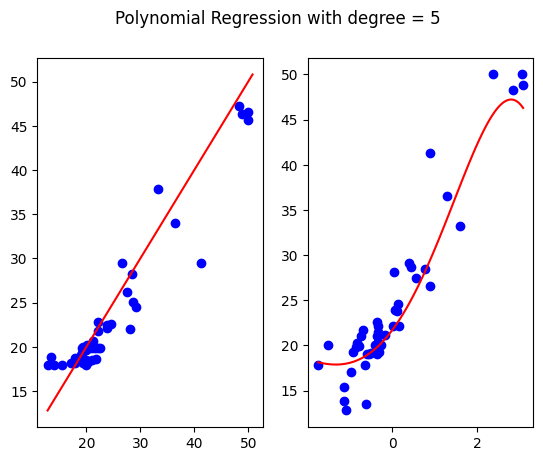

In [1943]:
for degree in range(1,6):
      polynomial_regression_model = MyPolynomialRegressor()
      polynomial_regression_model.fit("Gradient", degree, X_train["RM"],y_train)
      predictions=polynomial_regression_model.predict(X_test["RM"])
      print(f"Feature: RM RMSE: {round(polynomial_regression_model.get_root_mean_square_error(predictions,y_test),3)} "+\
            f"R2 score: {round(polynomial_regression_model.get_r2_score(predictions,y_test),3)}")
      polynomial_regression_model.plot_line(X_test["RM"], y_test)

## Phase 3

Pruning is a technique used to reduce the size of a decision tree by removing branches that do not contribute significantly to the accuracy of the tree. Pruning is done to prevent overfitting, improve the generalization ability of the model, and simplify the final decision tree. Pruning is an essential technique in decision tree learning to strike a balance between model complexity and performance.

**Advantages of Pruning Decision Trees:**

* **Prevents Overfitting**: Pruning helps prevent overfitting by removing unnecessary branches and reducing the complexity of the tree. This allows the model to generalize better to unseen data and improves its predictive performance.
* **Simplifies Interpretation**: Pruning results in simpler and more interpretable decision trees, which are easier to understand and explain to stakeholders or non-technical users. This can be valuable for gaining insights into the underlying data patterns and decision-making process.
* **Reduces Computational Complexity**: Pruning reduces the size of the decision tree, leading to faster training and inference times. Smaller trees require less memory and computational resources, making them more efficient to deploy in production environments.
Improves Model Robustness: By removing noise and irrelevant features, pruning enhances the robustness of the model to variations in the input data. It helps the model focus on the most informative features and avoid memorizing the training data.

**Disadvantages of Pruning Decision Trees:**

* **Potential Information Loss**: Pruning may lead to information loss by removing branches that contain useful information or patterns in the data. Over-pruning, in particular, can result in a too simplistic model that fails to capture important relationships in the data.
* **Dependent on Pruning Criterion**: The effectiveness of pruning depends on the choice of pruning criterion and hyperparameters. Selecting the appropriate pruning strategy and tuning the parameters can be challenging and may require experimentation.
* **Post-Pruning Complexity**: Post-pruning techniques, which involve growing the tree first and then selectively pruning branches, can be computationally intensive and require additional resources compared to pre-pruning methods. This complexity may limit the scalability of pruning algorithms for large datasets or deep trees.
* **Risk of Underfitting**: Pruning too aggressively or prematurely can lead to underfitting, where the model is too simple to capture the underlying patterns in the data. Balancing between underfitting and overfitting is crucial when pruning decision trees.

There are several scenarios where decision trees can outperform other models:

* **Interpretability**: Decision trees are inherently more interpretable than some models. Decision trees provide a clear set of rules that can be easily understood and visualized, making them useful for tasks where interpretability is crucial, such as in certain medical or legal applications.
* **Data with non-linear relationships**: Decision trees can model non-linear relationships in the data without the need for transformation, unlike some other models. In cases where the relationships between input features and the target variable are non-linear and can be easily separated by a set of if-else conditions, decision trees can perform better.
* **Computationally less expensive**: Training a decision tree is generally faster and less computationally intensive compared to training models like a neural network, especially for small to medium-sized datasets. Decision trees are also less prone to overfitting on smaller datasets.
* **Handling missing values**: Decision trees can handle missing values in the dataset without the need for imputation. They can make decisions based on the available data without requiring imputed values for missing entries.
* **Robustness to outliers**: Decision trees are robust to outliers in the data. Outliers may not significantly affect the performance of a decision tree, unlike some models which can be sensitive to outliers, especially in deep learning architectures.
* **Feature importance**: Decision trees can provide feature importance rankings, indicating which features are most influential in making predictions. This can be valuable for feature selection and understanding the importance of different variables in the model's decision-making process.

Classification based on the k-nearest neighbor algorithm differs from the other methods as this algorithm uses the data directly for classification, without building a model first. As such, no details of model construction need to be considered, and the only adjustable parameter in the model is k, the number of nearest neighbors to include in the estimate of class membership: the value of P(y|x) is calculated simply as the ratio of members of class y among the k nearest neighbors of x. By varying k, the model can be made more or less flexible (small or large values of k, respectively).

The advantage that k-nearest neighbors have over other algorithms is the fact that the neighbors can provide an explanation for the classification result; this case-based explanation can provide an advantage in areas where black-box models are inadequate.

The major drawback of k-nearest neighbors lies in the calculation of the case neighborhood: for this, one needs to define a metric that measures the distance between data items. In most application areas, it is not clear how to, other than by trial and error, define a metric in such a way that the relative (but unknown!) importance of data components is reflected in the metric.

The 1-N-N classifier is one of the oldest methods known. The idea is extremely simple: to classify X find its closest neighbor among the training points (call it X') and assign to X the label of X'.

**What is good about this method?**
* It is conceptually simple.
* It does not require learning (term: memory-base).
* It can be used even with few examples.
* Even for moderate k: wonderful performer.
* It works very well in low dimensions for complex decision surfaces.
* The nearest neighbor of X converges almost surely to X as the training size grows to infinity.

**What is bad about this method?**
* Classification is slow.
* It suffers A LOT from the curse-of-dimensionality.


**Euclidean distance**:
The most intuitive and widely used distance metric for KNN is the Euclidean distance, which is the straight-line distance between two points in a vector space. It is calculated by taking the square root of the sum of the squared differences between the corresponding coordinates of the two points. For example, if you have two points A and B with coordinates (x1, y1) and (x2, y2), the Euclidean distance between them is: d = sqrt((x1 - x2)^2 + (y1 - y2)^2) The Euclidean distance is suitable for data that has continuous and numerical features with similar scales and ranges. It can also handle outliers and noise well, as it gives more weight to larger differences. However, it can be affected by the curse of dimensionality, which means that as the number of features increases, the distance between any two points becomes less meaningful and more similar.

**Manhattan distance**:
Another common distance metric for KNN is the Manhattan distance, which is the sum of the absolute differences between the corresponding coordinates of two points. It is also known as the city block or taxicab distance, as it represents the distance that a car would have to travel along a grid of streets to get from one point to another. For example, if you have two points A and B with coordinates (x1, y1) and (x2, y2), the Manhattan distance between them is: d = abs(x1 - x2) + abs(y1 - y2) The Manhattan distance is suitable for data that has discrete and categorical features, as it does not penalize small differences as much as the Euclidean distance. It can also handle high-dimensional data better, as it is less sensitive to the curse of dimensionality. However, it can be influenced by the orientation and scale of the features, as it assumes that all directions are equally important and all units are comparable.

**Minkowski distance**:
A more general distance metric for KNN is the Minkowski distance, which is a generalization of the Euclidean and Manhattan distances. It is defined by a parameter p that controls how much emphasis is given to larger or smaller differences between coordinates. For example, if you have two points A and B with coordinates (x1, y1) and (x2, y2), the Minkowski distance between them is: d = (abs(x1 - x2)^p + abs(y1 - y2)^p)^(1/p) The Minkowski distance can be seen as a family of distance metrics that includes the Euclidean distance (p = 2), the Manhattan distance (p = 1), and the Chebyshev distance (p = infinity), which is the maximum of the absolute differences between coordinates. The Minkowski distance is suitable for data that has mixed types of features, as it allows you to adjust the parameter p to balance the importance of different features and distances. However, it can be computationally expensive and difficult to interpret, as the parameter p can have different effects on different data sets and problems.

**Cosine similarity**:
A different approach to measuring the distance between instances for KNN is to use the cosine similarity, which is the cosine of the angle between two vectors. It is calculated by taking the dot product of the two vectors and dividing it by the product of their magnitudes. For example, if you have two vectors A and B with coordinates (x1, y1) and (x2, y2), the cosine similarity between them is: s = (x1 * x2 + y1 * y2) / (sqrt(x1^2 + y1^2) * sqrt(x2^2 + y2^2)) The cosine similarity is suitable for data that has sparse and high-dimensional features, such as text or image data, as it measures the similarity based on the direction and not the magnitude of the vectors. It can also handle data that has different scales and units, as it normalizes the vectors before comparing them. However, it can be affected by the distribution and frequency of the features, as it assumes that all features are equally important and independent.

In [1945]:
df=original_df.copy()

In [1946]:
df.dropna(thresh=len(df.columns)-2, inplace=True)
df.isna().sum()

CRIM        0
ZN          0
INDUS       0
CHAS       26
NOX         0
RM          0
AGE         0
DIS        27
RAD         0
TAX         0
PTRATIO     0
B          20
LSTAT       0
MEDV       54
dtype: int64

In [1947]:
imputer = KNNImputer()
df['DIS'] = imputer.fit_transform(df[['DIS']])
df['DIS'].isna().sum()

0

In [1948]:
ref = df.groupby('RAD')['B'].mean()
df['B'] = df['B'].fillna(df['RAD'].map(ref))
df['B'].isna().sum()

0

In [1949]:
df['CHAS'].fillna(value=df['CHAS'].mode()[0], inplace=True)
df['CHAS'].isna().sum()

0

In [1950]:
df.dropna(subset=['MEDV'], inplace=True)
df['MEDV'].isna().sum()

0

In [1951]:
df = df[[col for col in df.columns.to_list() if col not in ['RAD']]]

In [1952]:
df.drop_duplicates(inplace=True)
df.count()

CRIM       452
ZN         452
INDUS      452
CHAS       452
NOX        452
RM         452
AGE        452
DIS        452
TAX        452
PTRATIO    452
B          452
LSTAT      452
MEDV       452
dtype: int64

In [1953]:
df["MEDVL"] = df["MEDV"].apply(lambda x: df["MEDV"].quantile([0.2,0.8]).to_numpy().searchsorted(x))

In [1954]:
df["MEDV"].quantile([0, 0.8])

0.0     6.3
0.8    29.1
Name: MEDV, dtype: float64

In [1955]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,MEDVL
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.900000,4.98,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.900000,9.14,21.6,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.830000,4.03,34.7,2
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,392.358108,2.94,33.4,2
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.900000,5.33,36.2,2


In [1956]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,MEDVL
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,1.420825,12.721239,10.304889,0.070796,0.540816,6.343538,65.557965,4.165218,377.442478,18.247124,369.971668,11.441881,23.750442,0.997788
std,2.495894,24.326032,6.797103,0.256769,0.113816,0.666808,28.127025,2.115495,151.327573,2.200064,68.422918,6.156437,8.808602,0.633503
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,6.300000,0.000000
25%,0.069875,0.000000,4.930000,0.000000,0.447000,5.926750,40.950000,2.386950,276.750000,16.800000,377.992500,6.587500,18.500000,1.000000
50%,0.191030,0.000000,8.140000,0.000000,0.519000,6.229000,71.800000,3.668700,307.000000,18.600000,391.985000,10.250000,21.950000,1.000000
75%,1.211460,20.000000,18.100000,0.000000,0.605000,6.635000,91.625000,5.952975,411.000000,20.200000,396.060000,15.105000,26.600000,1.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,34.410000,50.000000,2.000000


In [1957]:
df.MEDVL.value_counts()

MEDVL
1    271
0     91
2     90
Name: count, dtype: int64

In [1958]:
X, y = df[df.columns.difference(['MEDV','MEDVL'])], df['MEDVL']

In [ ]:
LABELS = ["Normal","Economical","Luxury"]

GridSearchCV works by defining a grid of hyperparameters and then systematically training and evaluating a machine learning model for each hyperparameter combination. The process of training and evaluating the model for each combination is called cross-validation. The best set of hyperparameters is then selected based on the performance metric.

In [1959]:
class MyClassifier(MyModel):
    def report_scores(self, predicted_values, actual_values, labels):
        print(f"Accuracy: {round(accuracy_score(actual_values,predicted_values),3)}")
        print(f"Recall: Micro: {round(recall_score(actual_values,predicted_values,average='micro'),3)}"+
                              f" Macro: {round(recall_score(actual_values,predicted_values,average='macro'),3)}"+
                              f" Weighted: {round(recall_score(actual_values,predicted_values,average='weighted'),3)}")
        print(f"Precision: Micro: {round(precision_score(actual_values,predicted_values,average='micro'),3)}"+
            f" Macro: {round(precision_score(actual_values,predicted_values,average='macro'),3)}"+
            f" Weighted: {round(precision_score(actual_values,predicted_values,average='weighted'),3)}")
        print(f"F1 score: Micro: {round(f1_score(actual_values,predicted_values,average='micro'),3)}"+
            f" Macro: {round(f1_score(actual_values,predicted_values,average='macro'),3)}"+
            f" Weighted: {round(f1_score(actual_values,predicted_values,average='weighted'),3)}")
        matrix=confusion_matrix(actual_values,predicted_values)
        sns.heatmap(matrix, annot=True, cmap="flare",xticklabels=labels,yticklabels=labels)

    def fit(self,X, y):
        self.model.fit(X,y)

    def predict(self,X):
        return self.model.predict(X)
    
    def fit_predict_report(self,X_train,y_train,X_test,y_test,labels):
        self.fit(X_train,y_train)
        predictions = self.predict(X_test)
        self.report_scores(predictions, y_test, labels)

    def report_roc_auc(self, X_train, y_train, X_test, y_test):
        model=OneVsRestClassifier(self.model)
        model.fit(X_train, y_train)
        pred_prob = model.predict_proba(X_test)
        for i in range(y_train.nunique()):
            fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,i], pos_label=i)
            print(f"ROC AUC for class {i}=%0.3f"%auc(fpr,tpr))
            plt.plot(fpr,tpr)
            plt.xlim([0,1])
            plt.ylim([0,1])
        plt.legend(labels=range(3))
        plt.show()

    def grid_search_params(self,param_grid,X,y):
        return GridSearchCV(self.model, param_grid=param_grid).fit(X,y).best_params_
    
    def randomized_search_params(self,param_distributions, X, y):
        return RandomizedSearchCV(self.model, param_distributions=param_distributions).fit(X, y).best_params_

In [1960]:
class MyDecisionTreeClassifier(MyClassifier):
    def __init__(self,random_state) -> None:
        super().__init__()
        self.model = DecisionTreeClassifier(random_state=random_state)

    def set_params(self, max_depth, criterion, min_samples_leaf, max_features, random_state):
        self.model = DecisionTreeClassifier(
            max_depth=max_depth, criterion=criterion,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,random_state=random_state)

    def plot_tree(self):
        plot_tree(self.model)

In [1962]:
X_train_validation, X_test, y_train_validation, y_test, X_train, X_validation, y_train, y_validation = \
train_validation_test_split(StandardScaler(), X,y,0.1,0.1,random_state)

Accuracy: 0.826
Recall: Micro: 0.826 Macro: 0.687 Weighted: 0.826
Precision: Micro: 0.826 Macro: 0.852 Weighted: 0.835
F1 score: Micro: 0.826 Macro: 0.741 Weighted: 0.813


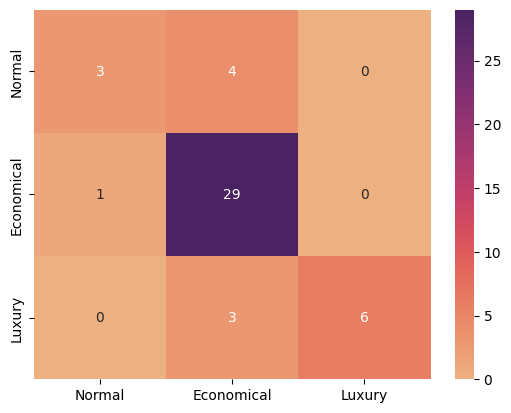

In [1963]:
decision_tree_model = MyDecisionTreeClassifier(random_state)
decision_tree_model.set_params(3,'gini',3,3, random_state)
decision_tree_model.fit_predict_report(
    X_train, y_train, X_validation, y_validation, LABELS)

Accuracy: 0.891
Recall: Micro: 0.891 Macro: 0.743 Weighted: 0.891
Precision: Micro: 0.891 Macro: 0.853 Weighted: 0.884
F1 score: Micro: 0.891 Macro: 0.784 Weighted: 0.882


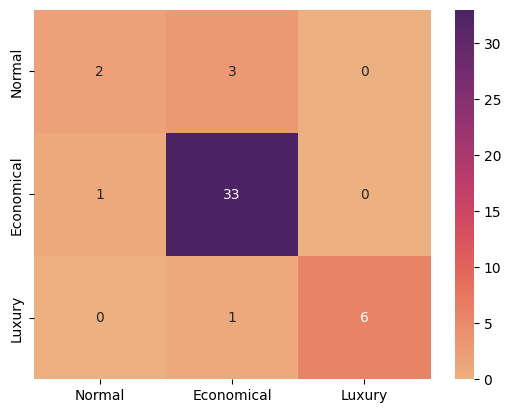

In [1964]:
decision_tree_model.fit_predict_report(
    X_train_validation, y_train_validation, X_test, y_testLABELS)

In [1965]:
best_params = decision_tree_model.grid_search_params({
    'max_depth': np.arange(1, 10),'criterion':["gini", "entropy", "log_loss"],
    'min_samples_leaf': np.arange(1, 6), 'max_features': np.arange(1, 6)}, X_train_validation, y_train_validation)
print(best_params)
decision_tree_model.set_params(
    best_params['max_depth'], best_params['criterion'],
    best_params['min_samples_leaf'], best_params['max_features'], random_state)

{'criterion': 'gini', 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 3}


Accuracy: 0.804
Recall: Micro: 0.804 Macro: 0.702 Weighted: 0.804
Precision: Micro: 0.804 Macro: 0.839 Weighted: 0.823
F1 score: Micro: 0.804 Macro: 0.731 Weighted: 0.794


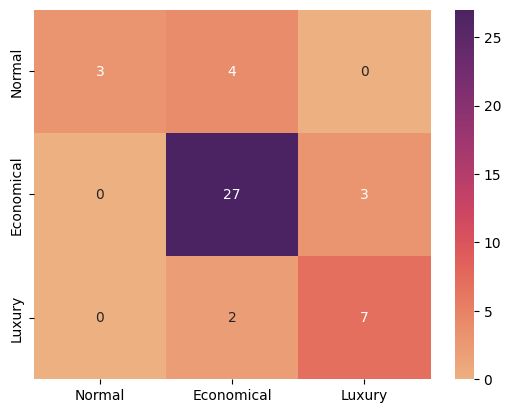

In [1966]:
decision_tree_model.fit_predict_report(
    X_train, y_train, X_validation, y_validationLABELS)

Accuracy: 0.783
Recall: Micro: 0.783 Macro: 0.675 Weighted: 0.783
Precision: Micro: 0.783 Macro: 0.673 Weighted: 0.786
F1 score: Micro: 0.783 Macro: 0.671 Weighted: 0.783


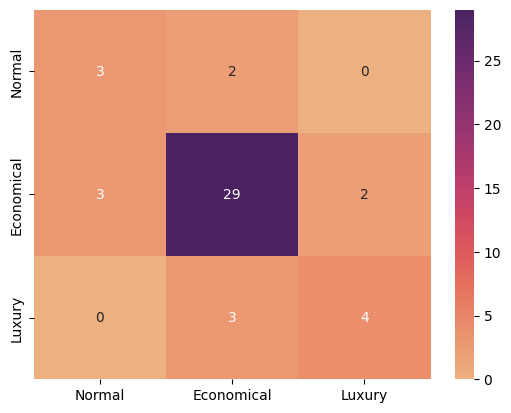

In [1967]:
decision_tree_model.fit_predict_report(
    X_train_validation, y_train_validation, X_test, y_testLABELS)

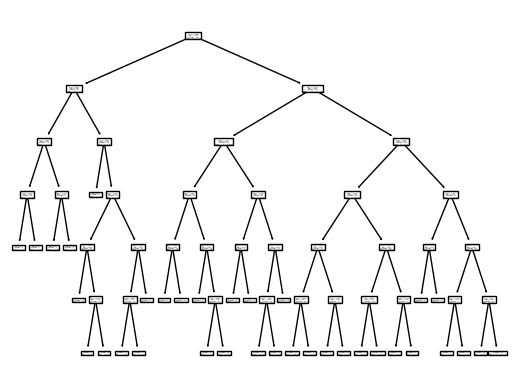

In [1968]:
decision_tree_model.plot_tree()

In [1969]:
class MyKNNClassifier(MyClassifier):
    def __init__(self) -> None:
        super().__init__()
        self.model = KNeighborsClassifier()
    def set_params(self, n_neighbors,metric):
        self.model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)

Accuracy: 0.783
Recall: Micro: 0.783 Macro: 0.686 Weighted: 0.783
Precision: Micro: 0.783 Macro: 0.748 Weighted: 0.785
F1 score: Micro: 0.783 Macro: 0.698 Weighted: 0.772


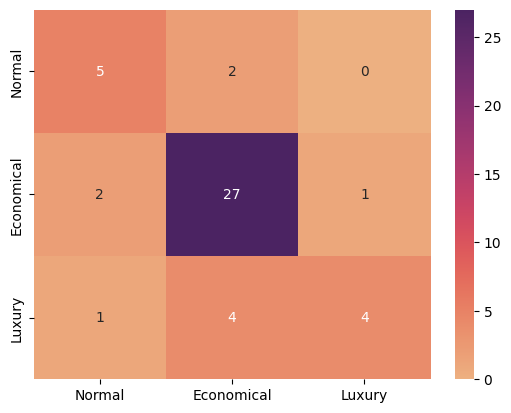

In [1970]:
KNN_model = MyKNNClassifier()
KNN_model.set_params(5,"euclidean")
KNN_model.fit_predict_report(
    X_train, y_train, X_validation, y_validationLABELS)

Accuracy: 0.826
Recall: Micro: 0.826 Macro: 0.732 Weighted: 0.826
Precision: Micro: 0.826 Macro: 0.739 Weighted: 0.833
F1 score: Micro: 0.826 Macro: 0.732 Weighted: 0.829


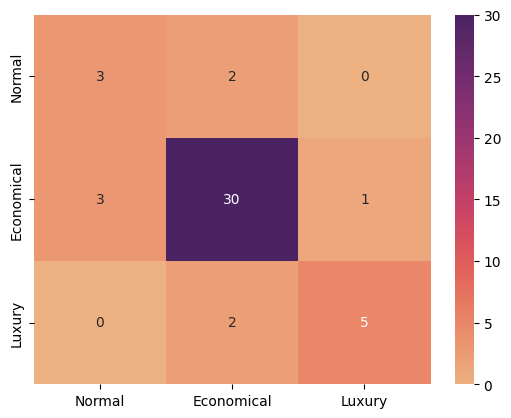

In [1971]:
KNN_model.fit_predict_report(
    X_train_validation, y_train_validation, X_test, y_testLABELS)

In [1972]:
best_params = KNN_model.grid_search_params(
    {'n_neighbors': np.arange(1, 10),
     'metric': ['russellrao', 'euclidean', 'l1', 'minkowski', 'hamming', 'dice',
                'l2', 'p', 'infinity', 'sokalmichener', 'sokalsneath',
                  'rogerstanimoto', 'sqeuclidean', 'braycurtis', 'jaccard', 'correlation', 'cosine',
                    'nan_euclidean', 'manhattan', 'chebyshev', 'canberra', 'cityblock']},
     X_train_validation, y_train_validation)
print(best_params)
KNN_model.set_params(best_params['n_neighbors'], best_params['metric'])

{'metric': 'euclidean', 'n_neighbors': 1}


Accuracy: 0.804
Recall: Micro: 0.804 Macro: 0.723 Weighted: 0.804
Precision: Micro: 0.804 Macro: 0.767 Weighted: 0.808
F1 score: Micro: 0.804 Macro: 0.735 Weighted: 0.8


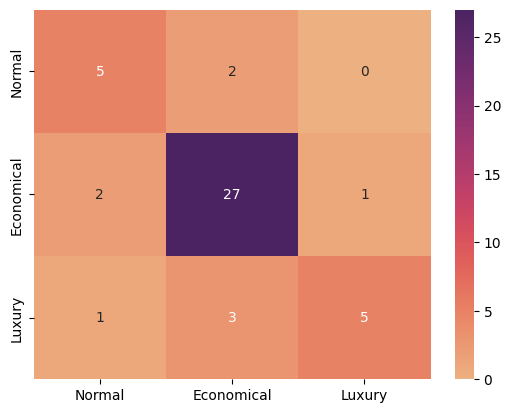

In [1973]:
KNN_model.fit_predict_report(
    X_train, y_train, X_validation, y_validationLABELS)

Accuracy: 0.848
Recall: Micro: 0.848 Macro: 0.799 Weighted: 0.848
Precision: Micro: 0.848 Macro: 0.763 Weighted: 0.853
F1 score: Micro: 0.848 Macro: 0.779 Weighted: 0.85


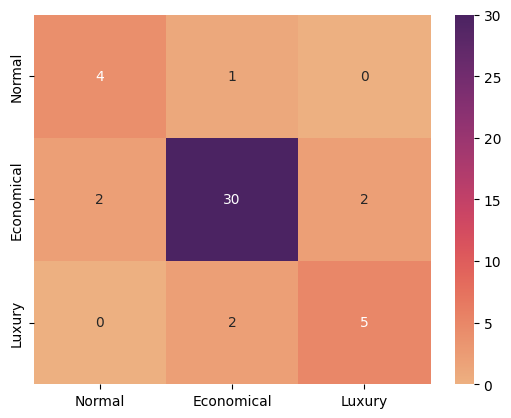

In [1974]:
KNN_model.fit_predict_report(
    X_train_validation, y_train_validation, X_test, y_testLABELS)

No because as we can see the model has high score in both for both validation and test data.\
`Overfitting` happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.\
`Underfitting` occurs when there is still room for improvement on the train data. This can happen for a number of reasons: If the model is not powerful enough, is over-regularized, or has simply not been trained long enough. This means the network has not learned the relevant patterns in the training data.

## Phase 4

* **Improved Accuracy**: Ensemble methods combine multiple base models (learners) to make predictions, which often results in higher accuracy than any single model alone. By leveraging the wisdom of crowds, ensemble methods can reduce bias and variance, leading to more reliable predictions.
* **Robustness to Overfitting**: Ensemble methods can mitigate overfitting, especially when using techniques such as bagging (bootstrap aggregating) or random forests. By training multiple models on different subsets of the data and averaging their predictions, ensemble methods can reduce the impact of noise and outliers in the training data.
* **Capturing Complex Relationships**: Ensemble methods are capable of capturing complex relationships and patterns in the data that may be difficult for individual models to learn. By combining multiple models with diverse perspectives, ensemble methods can effectively model nonlinear relationships and interactions between features.
Feature Importance Analysis: Ensemble methods provide insights into feature importance by aggregating the contributions of individual models. Features that consistently appear in multiple models or have higher predictive power across the ensemble are likely to be more important for making accurate predictions.
* **Versatility**: Ensemble methods are versatile and can be applied to a wide range of machine learning tasks, including classification, regression, and anomaly detection. They can be used with various base learners, such as decision trees, linear models, support vector machines, and neural networks.
* **Reduction of Model Variance**: Ensemble methods tend to have lower variance than individual models, which leads to more stable and reliable predictions across different subsets of the data. This makes ensemble methods particularly useful in situations where data may be noisy or limited.
* **Ensemble Diversity**: Ensemble methods benefit from diversity among base models, which can be achieved through different sampling techniques, feature subsets, or model architectures. Diverse models are less likely to make the same errors, resulting in more robust predictions.\

Overall, ensemble methods offer improved accuracy, robustness, and flexibility compared to individual models so they are are widely used in practice and have become a cornerstone of modern machine learning techniques.

**Bagging**
* Combines homogeneous `weak learners`.
* Homogenous = each weak learner is of the same type(e.g., all decision trees).
* A base learner (model) is trained on each bootstrap sample independently. Since each bootstrap sample is different, the base learners trained on them will also be different. This diversity helps reduce variance and overfitting.
* Weak learners are trained independently so parallelization is easy.
* Aggregate predictions from the weak learners either through averaging (for regression) or voting (for classification). This aggregation of predictions helps improve the overall accuracy and generalization ability of the ensemble model.

**Boosting**
* Models are trained sequentially.
* Weak learners are therefore not independent because model at current step depends on mdels at previous steps.
* At each step the weights of the observations that were previously misclassified are increased.
* The `strong learner` (final model) is a weighted sum of the weak learners. The better the weak learner the higher its weight.

The `random forest` algorithm is made up of a collection of decision trees, and each tree in the ensemble is comprised of a data sample drawn from a training set with replacement, called the bootstrap sample. Of that training sample, one-third of it is set aside as test data, known as the out-of-bag (oob) sample, which we’ll come back to later. In addition to bootstrap sampling, Random Forests also introduce randomness in feature selection. Instead of considering all features when making a split in a decision tree, Random Forests randomly select a subset of features at each split. This helps create diverse trees and reduces the correlation between individual trees. Depending on the type of problem, the determination of the prediction will vary. For a regression task, the individual decision trees will be averaged, and for a classification task, a majority vote—i.e. the most frequent categorical variable—will yield the predicted class. Finally, the oob sample is then used for cross-validation, finalizing that prediction.

Bagging involves creating multiple subsets of the training data by sampling with replacement (`bootstrap sampling`). Each subset, called a bootstrap sample, is typically the same size as the original dataset but contains different instances. Some instances may be repeated, while others may be omitted.\
Random Forests use bootstrap sampling to create diverse training datasets for each tree. Random Forests start by creating multiple bootstrap samples from the original dataset. Each bootstrap sample is created by randomly selecting instances from the dataset with replacement. This means that some instances may be selected multiple times, while others may be omitted.

Generally, increasing the number of trees in the Random Forest can lead to better performance.Here's how the number of trees can impact the performance of a Random Forest:
* **Improved Generalization**: Adding more trees to the Random Forest can improve the model's ability to generalize to new, unseen data. This is because the ensemble of trees is more robust and less likely to overfit to the training data.
* **Stability and Consistency**: Increasing the number of trees can also make the Random Forest more stable and consistent across different subsets of the data. The predictions tend to converge to a more reliable estimate of the true underlying distribution as the number of trees increases.
* **Computational Cost**: However, adding more trees also increases the computational cost of training and inference. Each additional tree requires more computational resources and time to train, which may become impractical for very large numbers of trees.
* **Trade-off**: There is typically a trade-off between model performance and computational cost. While increasing the number of trees can improve performance, there may be diminishing returns beyond a certain point where the additional computational cost outweighs the marginal improvement in performance.

Typical values for the number of trees is 10, 30 or 100. In only very few practical cases more than 300 trees outweights the cost of learning them (well, except maybe if you have a really huge dataset).

**Advantages of Random Forest**
* Versatile uses
* Easy-to-understand hyperparameters
* Classifier doesn't overfit with enough trees

**Disadvantages of Random Forest**
* Increased accuracy requires more trees
* More trees slow down model
* Can’t describe relationships within data

Random forest is a great algorithm to train early in the model development process, to see how it performs. Its simplicity makes building a “bad” random forest a tough proposition.\
The algorithm is also a great choice for anyone who needs to develop a model quickly. On top of that, it provides a pretty good indicator of the importance it assigns to your features.\
Random forests are also very hard to beat performance-wise. Of course, you can probably always find a model that can perform better — like a neural network, for example — but these usually take more time to develop, though they can handle a lot of different feature types, like binary, categorical and numerical.\
Overall, random forest is a (mostly) fast, simple and flexible tool, but not without some limitations.

By accounting for all the potential variability in the data, we can reduce the risk of overfitting, bias, and overall variance, resulting in more precise predictions.

Firstly, there is the `n_estimators` hyperparameter, which is just the number of trees the algorithm builds before taking the maximum voting or taking the averages of predictions. In general, a higher number of trees increases the performance and makes the predictions more stable, but it also slows down the computation.\
Another important hyperparameter is `max_features`, which is the maximum number of features random forest considers to split a node. Sklearn provides several options, all described in the documentation.\
Another important hyperparameter is `min_sample_leaf`. This determines the minimum number of leafs required to split an internal node.\
The `n_jobs` hyperparameter tells the engine how many processors it is allowed to use. If it has a value of one, it can only use one processor. A value of “-1” means that there is no limit.\
The `random_state` hyperparameter makes the model’s output replicable. The model will always produce the same results when it has a definite value of random_state and if it has been given the same hyperparameters and the same training data.\
Lastly, there is the `oob_score` (also called oob sampling), which is a random forest cross-validation method. In this sampling, about one-third of the data is not used to train the model and can be used to evaluate its performance. These samples are called the out-of-bag samples. It’s very similar to the leave-one-out-cross-validation method, but almost no additional computational burden goes along with it.    

In [1975]:
class MyRandomForestClassifier(MyClassifier):
    def __init__(self, random_state) -> None:
        super().__init__()
        self.model = RandomForestClassifier(oob_score=False, n_jobs=-1,random_state=random_state)

    def set_params(self, n_estimators, max_features, min_samples_leaf, random_state) -> None:
        self.model = RandomForestClassifier(oob_score=False,n_jobs=-1,n_estimators=n_estimators,max_features=max_features, 
                                            min_samples_leaf=min_samples_leaf,random_state=random_state)
        
    def plot_feature_importance(self, columns) -> None:
        plt.figure(figsize=(8, 6))
        plt.bar(columns, self.model.feature_importances_)
        plt.show()

In [1977]:
X_train_validation, X_test, y_train_validation, y_test, X_train, X_validation, y_train, y_validation = \
train_validation_test_split(Normalizer(), X,y,0.1,0.1,random_state)

In [1978]:
random_forest_model = MyRandomForestClassifier(random_state)
best_params = random_forest_model.grid_search_params(
    {'n_estimators': np.arange(70, 101, 20),
     'max_features': np.arange(7, 12),
     'min_samples_leaf': np.arange(1, 5)}, X_train_validation, y_train_validation)
print(best_params)
random_forest_model.set_params(
    best_params['n_estimators'], best_params['max_features'], 
    best_params['min_samples_leaf'],random_state)

{'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 90}


Accuracy: 0.87
Recall: Micro: 0.87 Macro: 0.86 Weighted: 0.87
Precision: Micro: 0.87 Macro: 0.82 Weighted: 0.874
F1 score: Micro: 0.87 Macro: 0.837 Weighted: 0.869


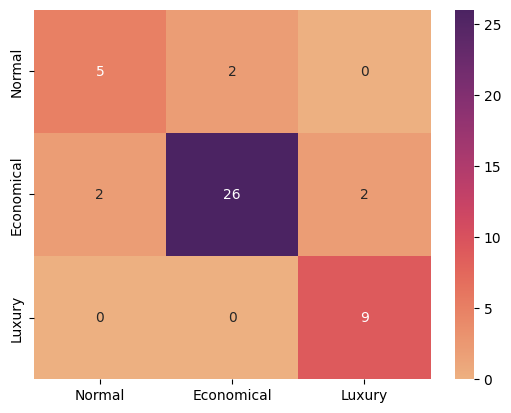

In [1979]:
random_forest_model.fit_predict_report(
    X_train, y_train, X_validation, y_validationLABELS)

Accuracy: 0.848
Recall: Micro: 0.848 Macro: 0.875 Weighted: 0.848
Precision: Micro: 0.848 Macro: 0.748 Weighted: 0.886
F1 score: Micro: 0.848 Macro: 0.793 Weighted: 0.857


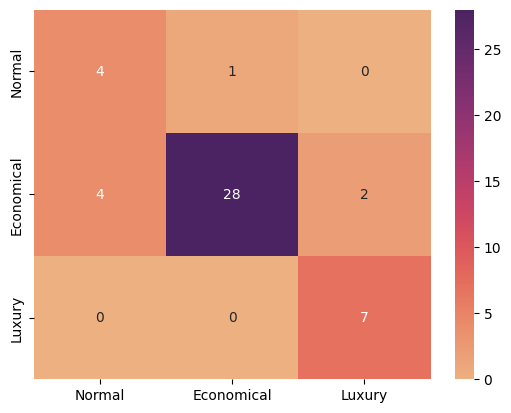

In [1980]:
random_forest_model.fit_predict_report(
    X_train_validation, y_train_validation, X_test, y_testLABELS)

As expected LSTAT and RM have the highest importance among features.

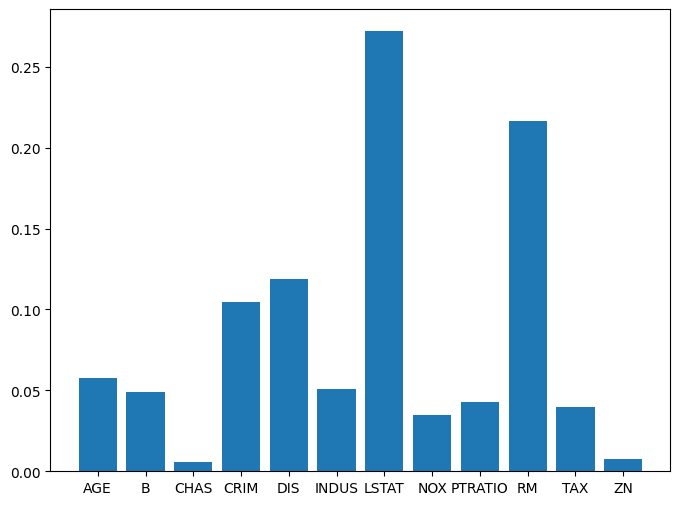

In [1981]:
random_forest_model.plot_feature_importance(X.columns)

### XGBoost

**XGBoost** is an optimized Gradient Boosting model. However, it contains several other key features which makes it standout: regularization, handling missing values, cross-validation, paralelization, tree pruning, versatility and easy interface.

**Gradient Boosted Trees** like Random Forest is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. However, the differ in how indivisual trees are built and the way results are combined. Random forest use the bagging ensemble strategy to build the trees. On the other hand, XGBoost uses the boosting ensemble strategy. It combines weak learners sequentially so that each new tree corrects the errors of the previous one. Weak learners are usually decision trees with one split called decision stumps. The first step is to fit a single decision tree. Then we'll evaluate how well this tree performs using a loss function. There are many loss functions to choose from. For multiclass classification cross entropy is a popular loss function. The second step is to fit a second decision tree such taht when added to the first it lowers the cost compared to the first tree alone. We want to find the direction in which the loss decreases the fastest. Therefore we fit the second weak learner on the derivative of loss function with respect to the output of the previous tree. That is why this method is called gradient boosting. Compared to random forests gradient boosted trees have a lot of model capacity so they can model very complex relationships and decision boundaries. However, as with all models with high capacity this can lead to overfitting very quickly.

In [1982]:
class MyXGBoostClassifier(MyClassifier):
    def __init__(self, random_state) -> None:
        super().__init__()
        self.model = xgb.XGBClassifier(random_state=random_state)

    def set_params(self, learning_rate, max_depth,min_child_weight,colsample_bytree,n_estimators, random_state) -> None:
        self.model = xgb.XGBClassifier(
            learning_rate=learning_rate, max_depth=max_depth, 
            min_child_weight=min_child_weight, colsample_bytree=colsample_bytree,
            n_estimators=n_estimators,random_state=random_state)

    def plot_feature_importance(self, columns) -> None:
        plt.figure(figsize=(8, 6))
        plt.bar(columns, self.model.feature_importances_)
        plt.show()

In [1984]:
X_train_validation, X_test, y_train_validation, y_test, X_train, X_validation, y_train, y_validation = \
train_validation_test_split(StandardScaler(), X,y,0.1,0.1,random_state)

In [1985]:
XGBoost_model = MyXGBoostClassifier(random_state)
best_params = XGBoost_model.randomized_search_params(
    {"learning_rate": scipy.stats.distributions.uniform(loc=0.5, scale=0.5),
     "max_depth": scipy.stats.randint(1, 100), "min_child_weight": scipy.stats.randint(1, 100), 
     "colsample_bytree": scipy.stats.distributions.uniform(loc=0.5, scale=0.5), "n_estimators": scipy.stats.randint(1, 1000)},
    X_train_validation, y_train_validation)
print(best_params)
XGBoost_model.set_params(
    best_params['learning_rate'], best_params['max_depth'],
    best_params['min_child_weight'], best_params['colsample_bytree'],
    best_params['n_estimators'], random_state)

{'colsample_bytree': 0.9159627935102141, 'learning_rate': 0.7670269897715889, 'max_depth': 45, 'min_child_weight': 4, 'n_estimators': 144}


Accuracy: 0.87
Recall: Micro: 0.87 Macro: 0.834 Weighted: 0.87
Precision: Micro: 0.87 Macro: 0.834 Weighted: 0.87
F1 score: Micro: 0.87 Macro: 0.834 Weighted: 0.87


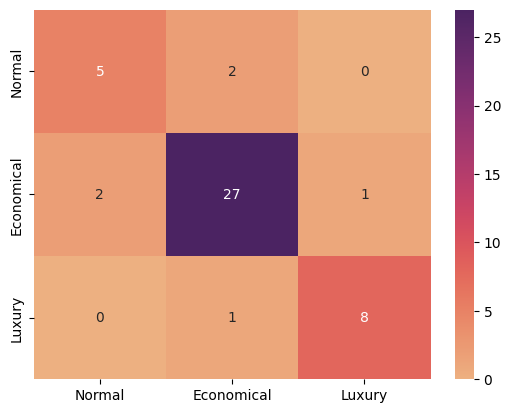

In [1986]:
XGBoost_model.fit_predict_report(
    X_train, y_train, X_validation, y_validationLABELS)

Accuracy: 0.891
Recall: Micro: 0.891 Macro: 0.894 Weighted: 0.891
Precision: Micro: 0.891 Macro: 0.804 Weighted: 0.906
F1 score: Micro: 0.891 Macro: 0.842 Weighted: 0.894


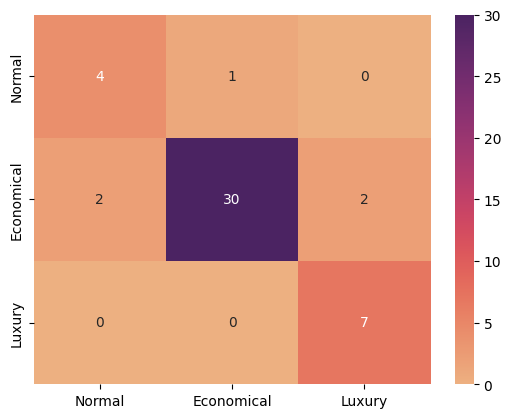

In [1987]:
XGBoost_model.fit_predict_report(
    X_train_validation, y_train_validation, X_test, y_testLABELS)

In [1988]:
best_params = XGBoost_model.grid_search_params(
    {"learning_rate": np.arange(0.9,1,0.045),
     "max_depth": np.arange(35, 37), "min_child_weight" : np.arange(20, 22)
     , "colsample_bytree": np.arange(0.5, 1, 0.3), "n_estimators": np.arange(190, 210,10)},
     X_train_validation, y_train_validation)
print(best_params)
XGBoost_model.set_params(
    best_params['learning_rate'], best_params['max_depth'], 
    best_params['min_child_weight'], best_params['colsample_bytree'], 
    best_params['n_estimators'], random_state)

{'colsample_bytree': 0.8, 'learning_rate': 0.9, 'max_depth': 35, 'min_child_weight': 20, 'n_estimators': 200}


Accuracy: 0.804
Recall: Micro: 0.804 Macro: 0.739 Weighted: 0.804
Precision: Micro: 0.804 Macro: 0.762 Weighted: 0.805
F1 score: Micro: 0.804 Macro: 0.749 Weighted: 0.804


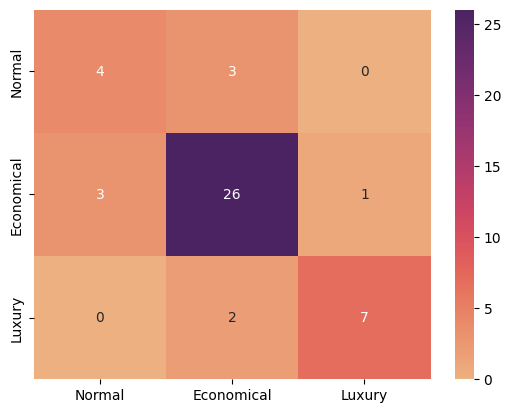

In [1989]:
XGBoost_model.fit_predict_report(
    X_train, y_train, X_validation, y_validationLABELS)

Accuracy: 0.848
Recall: Micro: 0.848 Macro: 0.875 Weighted: 0.848
Precision: Micro: 0.848 Macro: 0.746 Weighted: 0.882
F1 score: Micro: 0.848 Macro: 0.793 Weighted: 0.855


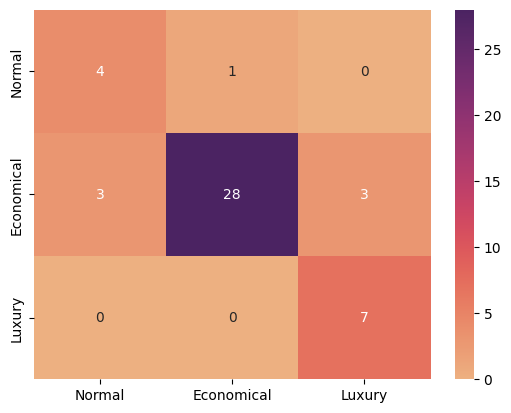

In [1990]:
XGBoost_model.fit_predict_report(
    X_train_validation, y_train_validation, X_test, y_testLABELS)

## Phase 5

**Grid Search**

When performing hyperparameter optimization, we first need to define a parameter space or parameter grid, where we include a set of possible hyperparameter values that can be used to build the model.

The grid search technique is then used to place these hyperparameters in a matrix-like structure, and the model is trained on every combination of hyperparameter values.

The model with the best performance is then selected.

**Random Search**

 While grid search looks at every possible combination of hyperparameters to find the best model, random search only selects and tests a random combination of hyperparameters.

This technique randomly samples from a grid of hyperparameters instead of conducting an exhaustive search.

We can specify the number of total runs the random search should try before returning the best model.

Now that you have a basic understanding of how random search and grid search work, I will show you how to implement these techniques using the Scikit-Learn library.

**Which one to use?**

* Use grid search if you already have a ballpark range of known hyperparameter values that will perform well. Make sure to keep your parameter space small, because grid search can be extremely time-consuming.
* Use random search on a broad range of values if you don’t already have an idea of the parameters that will perform well on your model. Random search is faster than grid search and should always be used when you have a large parameter space.
* It is also a good idea to use both random search and grid search to get the best possible results.
You can use random search first with a large parameter space since it is faster. Then, use the best hyperparameters found by random search to narrow down the parameter grid, and feed a smaller range of values to grid search.

Here I've first used the randomized search to find an approximate range for parameters then used the grid search to find the best parameters in that range.

In [1991]:
class MySVMClassifier(MyClassifier):
    def __init__(self, kernel) -> None:
        super().__init__()
        self.model = SVC(kernel=kernel)

    def set_params(self, kernel,C, degree):
        self.model = SVC(kernel=kernel,C=C, degree=degree)

In [1992]:
rbf_SVM_model = MySVMClassifier('rbf')
best_params = rbf_SVM_model.randomized_search_params({'C': scipy.stats.distributions.uniform(loc=100, scale=1000),
                                                  'degree': scipy.stats.randint(1, 100)}, X_train_validation, y_train_validation)
print(best_params)
rbf_SVM_model.set_params('rbf', best_params['C'], best_params['degree'])

{'C': 510.9143772217237, 'degree': 63}


Accuracy: 0.783
Recall: Micro: 0.783 Macro: 0.738 Weighted: 0.783
Precision: Micro: 0.783 Macro: 0.723 Weighted: 0.793
F1 score: Micro: 0.783 Macro: 0.726 Weighted: 0.786


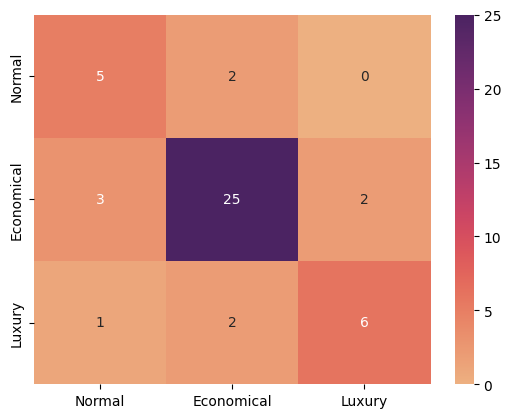

In [1993]:
rbf_SVM_model.fit_predict_report(
    X_train, y_train, X_validation, y_validationLABELS)

Accuracy: 0.826
Recall: Micro: 0.826 Macro: 0.846 Weighted: 0.826
Precision: Micro: 0.826 Macro: 0.728 Weighted: 0.853
F1 score: Micro: 0.826 Macro: 0.77 Weighted: 0.832


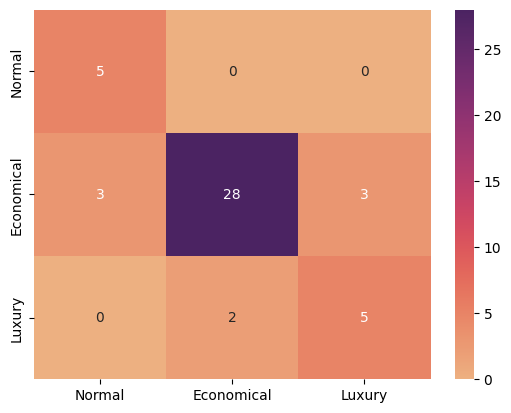

In [1994]:
rbf_SVM_model.fit_predict_report(
    X_train_validation, y_train_validation, X_test, y_testLABELS)

In [1995]:
best_params = rbf_SVM_model.grid_search_params({'C': np.arange(1, 1001, 100),
                                            'degree': np.arange(1, 100)}, X_train_validation, y_train_validation)
print(best_params)
rbf_SVM_model.set_params('rbf', best_params['C'], best_params['degree'])

{'C': 101, 'degree': 1}


Accuracy: 0.826
Recall: Micro: 0.826 Macro: 0.776 Weighted: 0.826
Precision: Micro: 0.826 Macro: 0.762 Weighted: 0.835
F1 score: Micro: 0.826 Macro: 0.768 Weighted: 0.83


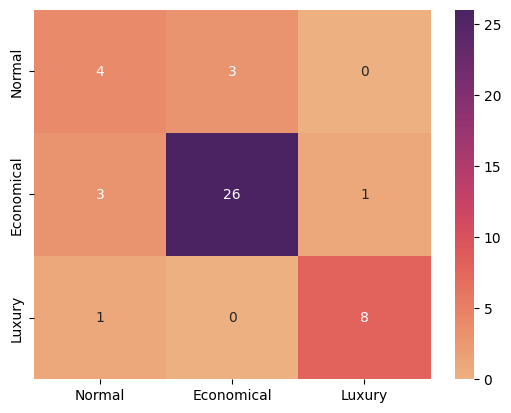

In [1996]:
rbf_SVM_model.fit_predict_report(
    X_train, y_train, X_validation, y_validationLABELS)

Accuracy: 0.783
Recall: Micro: 0.783 Macro: 0.713 Weighted: 0.783
Precision: Micro: 0.783 Macro: 0.653 Weighted: 0.806
F1 score: Micro: 0.783 Macro: 0.677 Weighted: 0.791


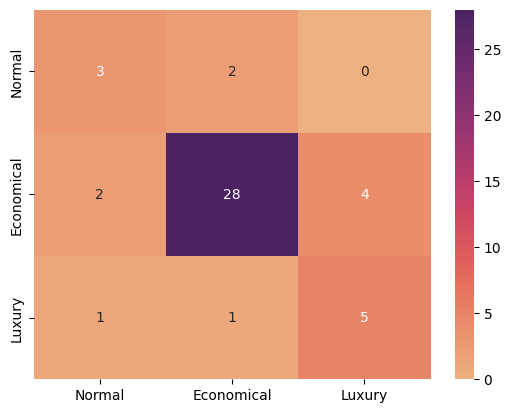

In [1997]:
rbf_SVM_model.fit_predict_report(
    X_train_validation, y_train_validation, X_test, y_testLABELS)

In [2004]:
linear_SVM_model = MySVMClassifier('linear')
best_params = linear_SVM_model.randomized_search_params({'C': scipy.stats.distributions.uniform(loc=100, scale=1000),
                                                  'degree': scipy.stats.randint(1, 100)}, X_train_validation, y_train_validation)
print(best_params)
linear_SVM_model.set_params('linear', best_params['C'], best_params['degree'])

{'C': 841.4369917920238, 'degree': 15}


Accuracy: 0.848
Recall: Micro: 0.848 Macro: 0.813 Weighted: 0.848
Precision: Micro: 0.848 Macro: 0.789 Weighted: 0.848
F1 score: Micro: 0.848 Macro: 0.8 Weighted: 0.847


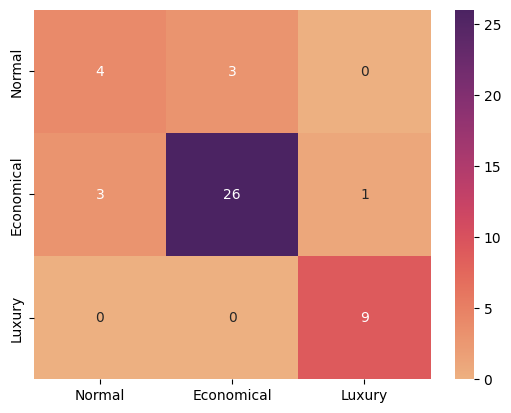

In [2005]:
linear_SVM_model.fit_predict_report(
    X_train, y_train, X_validation, y_validationLABELS)

Accuracy: 0.826
Recall: Micro: 0.826 Macro: 0.789 Weighted: 0.826
Precision: Micro: 0.826 Macro: 0.717 Weighted: 0.854
F1 score: Micro: 0.826 Macro: 0.741 Weighted: 0.835


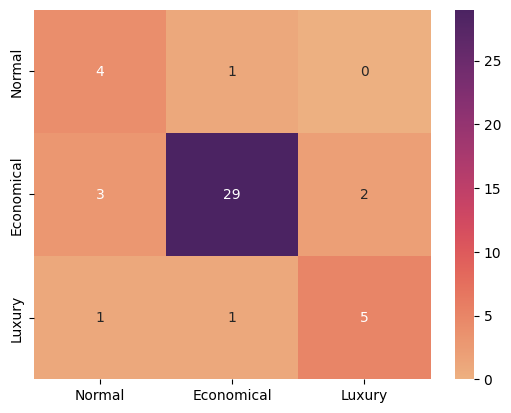

In [2006]:
linear_SVM_model.fit_predict_report(
    X_train_validation, y_train_validation, X_test, y_testLABELS)

In [2013]:
best_params = linear_SVM_model.grid_search_params({'C': np.arange(500, 700, 50),
                                            'degree': np.arange(10, 15)}, X_train_validation, y_train_validation)
print(best_params)
linear_SVM_model.set_params('linear', best_params['C'], best_params['degree'])

{'C': 500, 'degree': 10}


Accuracy: 0.848
Recall: Micro: 0.848 Macro: 0.813 Weighted: 0.848
Precision: Micro: 0.848 Macro: 0.789 Weighted: 0.848
F1 score: Micro: 0.848 Macro: 0.8 Weighted: 0.847


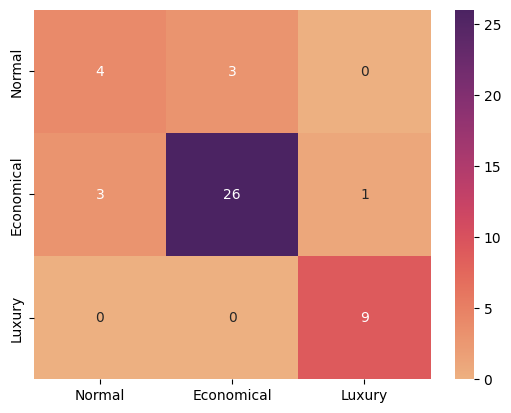

In [2014]:
linear_SVM_model.fit_predict_report(
    X_train, y_train, X_validation, y_validationLABELS)

Accuracy: 0.826
Recall: Micro: 0.826 Macro: 0.789 Weighted: 0.826
Precision: Micro: 0.826 Macro: 0.717 Weighted: 0.854
F1 score: Micro: 0.826 Macro: 0.741 Weighted: 0.835


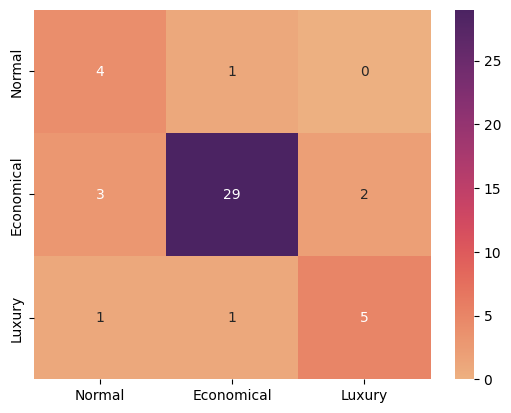

In [2015]:
linear_SVM_model.fit_predict_report(
    X_train_validation, y_train_validation, X_test, y_testLABELS)

# Phase 7

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classification model across different threshold values. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.\
Here's how the ROC curve is constructed and interpreted:\
`True Positive Rate (TPR)`: Also known as sensitivity or recall, TPR measures the proportion of positive instances (actual positives) that are correctly identified by the model as positive. It is calculated as TPR = TP / (TP + FN), where TP is the number of true positives and FN is the number of false negatives.\
`False Positive Rate (FPR)`: FPR measures the proportion of negative instances (actual negatives) that are incorrectly identified by the model as positive. It is calculated as FPR = FP / (FP + TN), where FP is the number of false positives and TN is the number of true negatives.\
`ROC Curve Plotting`: The ROC curve is created by plotting TPR on the y-axis against FPR on the x-axis for different threshold values. Each point on the ROC curve represents a specific threshold setting, where a higher threshold leads to fewer positive predictions and vice versa.\
`Interpretation:`\
`Ideal Model`: In an ideal scenario, the ROC curve would hug the top-left corner of the plot, indicating a high TPR and a low FPR across all threshold values. This represents a model that achieves perfect discrimination between the positive and negative classes.\
`Random Model`: A random classifier would produce an ROC curve that is a diagonal line from the bottom-left to the top-right of the plot, indicating that the TPR and FPR are equal across all threshold values.\
`Model Comparison`: ROC curves are useful for comparing the performance of different classification models. A model with a higher ROC curve (i.e., closer to the top-left corner) generally indicates better performance in terms of discriminating between the positive and negative classes.

AUC represents the area under the ROC curve. AUC provides a single scalar value that summarizes the performance of the classifier. It ranges from 0 to 1, where:
* AUC = 1 indicates perfect discrimination, where the model achieves a TPR of 1 (correctly identifies all positives) and an FPR of 0 (makes no false positive predictions).
* AUC = 0.5 indicates no discrimination ability, equivalent to random guessing. The ROC curve follows the diagonal line from the bottom-left to the top-right corner.
* AUC < 0.5 indicates worse than random performance, where the model performs worse than simply flipping a coin to make predictions.

AUC is a robust metric that is insensitive to class imbalance and threshold selection. It evaluates the model's performance across all possible threshold values, providing a comprehensive assessment of its discriminative ability.\
AUC is particularly useful for comparing the performance of different classification models. A higher AUC value generally indicates better discriminative ability and suggests a more effective model for the given classification task.\
AUC is independent of the threshold used for class prediction. This means that it reflects the model's ability to rank instances correctly rather than its performance at a specific threshold.\
Calculating the AUC involves generating the ROC curve and then integrating the area under the curve. Once the ROC curve is generated, the AUC can be calculated by integrating the area under the curve. This can be done numerically using methods such as the trapezoidal rule or the Simpson's rule.

To choose the best threshold for a specific application, you can use the ROC curve itself along with additional considerations based on the specific goals and requirements of the task. Here's a general approach for choosing the best threshold using the ROC curve and AUC:

1. Plot the ROC Curve: First, generate the ROC curve by calculating the True Positive Rate (TPR) and False Positive Rate (FPR) at various threshold values for classifying instances into positive and negative classes. Plot the ROC curve to visualize the trade-off between sensitivity (TPR) and specificity (1 - FPR) at different thresholds.
2. Select Operating Point: Identify the point on the ROC curve that best balances the trade-off between true positives and false positives based on the specific requirements of the task. This may involve considering factors such as the relative importance of sensitivity and specificity, the costs associated with false positives and false negatives, and the desired operating point for the classifier.
3. Performance Evaluation: Evaluate the performance of the model using the chosen threshold by calculating performance metrics such as accuracy, precision, recall, F1-score, or other relevant metrics based on the task requirements.
Validation and Adjustment: Validate the chosen threshold using cross-validation or a separate validation dataset to ensure that it generalizes well to new, unseen data. Adjust the threshold if necessary based on the performance evaluation results and feedback from stakeholders.
4. Iterative Process: Threshold selection is often an iterative process that involves experimentation, evaluation, and refinement based on feedback and performance analysis. It may require trade-offs and adjustments to find the optimal threshold for the specific application.

There are two strategies to use ROC curve for multiclass problems:
* **One-vs-One**: It computes ROC curve for all combination of classes and then averages to get a single value.
* **One-vs-Rest**: It computes ROC curve of each class against the rest and then takes the average.

ROC AUC for class 0=0.859
ROC AUC for class 1=0.831
ROC AUC for class 2=0.899


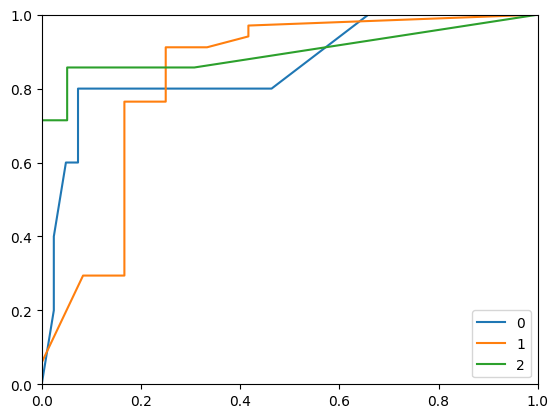

In [2016]:
decision_tree_model.report_roc_auc(
    X_train_validation, y_train_validation, X_test, y_test)

ROC AUC for class 0=0.876
ROC AUC for class 1=0.816
ROC AUC for class 2=0.832


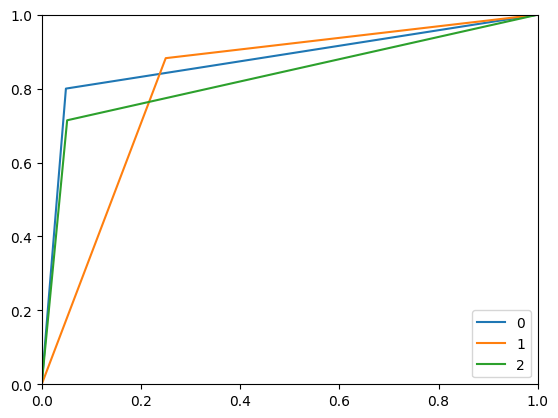

In [2017]:
KNN_model.report_roc_auc(
    X_train_validation, y_train_validation, X_test, y_test)

ROC AUC for class 0=0.937
ROC AUC for class 1=0.926
ROC AUC for class 2=0.982


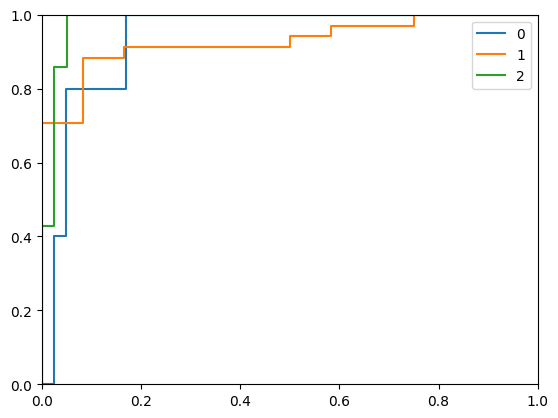

In [2018]:
random_forest_model.report_roc_auc(
    X_train_validation, y_train_validation, X_test, y_test)

Although ROC graphs are drawn using `True Positive Rates` and `False Positive Rayes` to summarize confusion matrices, there are other metrics that attempt to do the same thing. For example, people often replace the `False Positive Rate` with `Precision`. `Precision` does not include the number of `True Negatives` in its calculation, and is not affected by the imbalance. In practice, this sort of imbalance occurs when studying a rare disease. In this case, the study will contain manby more people without the disease than with the disease.

Yes changing the threshold changes the accuracy and number of samples in each class.

In [2019]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
threshold=[0.2,0.2]
predicted_proba = model.predict_proba(X_test)
predicted = (predicted_proba[:, 0] < threshold[0]).astype('int') + (predicted_proba[:, 1] < threshold[1]).astype('int')
accuracy_score(y_test, predicted)

0.7391304347826086

In [2020]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
threshold = [0.2, 0.4]
predicted_proba = model.predict_proba(X_test)
predicted = (predicted_proba[:, 0] < threshold[0]).astype(
    'int') + (predicted_proba[:, 1] < threshold[1]).astype('int')
accuracy_score(y_test, predicted)

0.7608695652173914

In [2021]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
threshold = [0.2, 0.5]
predicted_proba = model.predict_proba(X_test)
predicted = (predicted_proba[:, 0] < threshold[0]).astype(
    'int') + (predicted_proba[:, 1] < threshold[1]).astype('int')
accuracy_score(y_test, predicted)

0.782608695652174

In [2022]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
threshold = [0.1, 0.5]
predicted_proba = model.predict_proba(X_test)
predicted = (predicted_proba[:, 0] < threshold[0]).astype(
    'int') + (predicted_proba[:, 1] < threshold[1]).astype('int')
accuracy_score(y_test, predicted)

0.717391304347826

In [2023]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
threshold = [0.1, 0.9]
predicted_proba = model.predict_proba(X_test)
predicted = (predicted_proba[:, 0] < threshold[0]).astype(
    'int') + (predicted_proba[:, 1] < threshold[1]).astype('int')
accuracy_score(y_test, predicted)

0.8043478260869565

## References

https://medium.com/@iqra.bismi/using-hexbin-plots-to-visualise-relationship-between-two-variables-42e26bce3df1\
https://www.shiksha.com/online-courses/articles/normalization-and-standardization\
https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization\
https://www.youtube.com/watch?v=bqhQ2LWBheQ\
https://www.youtube.com/watch?v=ybSQx8mkszk\
https://www.youtube.com/watch?v=sxEqtjLC0aM\
https://www.geeksforgeeks.org/data-preprocessing-in-data-mining\
https://www.javatpoint.com/regression-vs-classification-in-machine-learning\
https://www.youtube.com/watch?v=TJveOYsK6MY\
https://www.linkedin.com/pulse/what-pruning-decision-tree-ml-concepts-com\
https://www.quora.com/When-does-the-decision-tree-perform-better-than-the-neural-network\
https://www.quora.com/How-does-KNN-classification-compare-to-classification-by-neural-networks\
https://www.sciencedirect.com/science/article/pii/S1532046403000340\
https://www.ee.columbia.edu/~vittorio/lecture8.pdf\
https://www.linkedin.com/advice/3/what-most-effective-distance-metrics-optimizing-xndwc\
https://dev.to/anurag629/gridsearchcv-in-scikit-learn-a-comprehensive-guide-2a72\
https://www.investopedia.com/terms/o/overfitting.asp\
https://aws.amazon.com/what-is/overfitting\
https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms\
https://www.tensorflow.org/tutorials/keras/overfit_and_underfit\
https://www.youtube.com/watch?v=eLt4a8-316E\
https://medium.com/@roshmitadey/bagging-v-s-boosting-be765c970fd1\
https://builtin.com/data-science/random-forest-algorithm\
https://www.ibm.com/topics/random-forest\
https://www.researchgate.net/post/How_to_determine_the_number_of_trees_to_be_generated_in_Random_Forest_algorithm\
https://www.kdnuggets.com/2022/10/hyperparameter-tuning-grid-search-random-search-python.html\
https://www.youtube.com/watch?v=-s-KdkYmCaA\
https://stats.stackexchange.com/questions/2151/how-to-plot-roc-curves-in-multiclass-classification\
https://www.geeksforgeeks.org/multiclass-receiver-operating-characteristic-roc-in-scikit-learn\
https://www.youtube.com/watch?v=TyvYZ26alZs\
https://www.youtube.com/watch?v=33fGfuleXw0\
https://www.youtube.com/watch?v=4jRBRDbJemM